In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [2]:
stReal=pd.read_csv('./spotify_tracks.csv')

In [3]:
st=stReal.copy()

In [4]:
st.head(5)

track_id                                  track_name  \
0  2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1  4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3  5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   

                                         artist_name  year  popularity  \
0                                Anirudh Ravichander  2024          59   
1  Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
3  Anirudh Ravichander, Bharath Sankar, Kabilan, ...  2024          24   
4  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   

                                         artwork_url  \
0  https://i.scdn.co/image/ab67616d0000b273ce9c65...   
1  https://i.scdn.co/image/ab67616d0000b273be1b03...   
2  https://i.scdn.co/image/ab67616d0000b27334a1dd...   
3  https://i.scdn.co/image/ab67616d0000b27332e623...   
4  https://i.scdn.co/image/ab67616d0000b2735a59b6...   

                                   album_name  acousticness  danceability  \
0                  Leo Das Entry (From "Leo")        0.0241         0.753   
1                                AAO KILLELLE        0.0851         0.780   
2      Mayakiriye Sirikiriye (Orchestral EDM)        0.0311         0.457   
3    Scene Ah Scene Ah (Experimental EDM Mix)        0.2270         0.718   
4  Gundellonaa X I Am a Disco Dancer (Mashup)        0.0153         0.689   

   duration_ms  ...   key  liveness  loudness  mode  speechiness    tempo  \
0      97297.0  ...   8.0    0.1000    -5.994   0.0       0.1030  110.997   
1     207369.0  ...  10.0    0.0951    -5.674   0.0       0.0952  164.995   
2      82551.0  ...   2.0    0.0831    -8.937   0.0       0.1530  169.996   
3     115831.0  ...   7.0    0.1240   -11.104   1.0       0.4450  169.996   
4     129621.0  ...   7.0    0.3450    -9.637   1.0       0.1580  128.961   

   time_signature  valence                                          track_url  \
0             4.0    0.459  https://open.spotify.com/track/2r0ROhr7pRN4MXD...   
1             3.0    0.821  https://open.spotify.com/track/4I38e6Dg52a2o2a...   
2             4.0    0.598  https://open.spotify.com/track/59NoiRhnom3lTeR...   
3             4.0    0.362  https://open.spotify.com/track/5uUqRQd385pvLxC...   
4             4.0    0.593  https://open.spotify.com/track/1KaBRg2xgNeCljm...   

   language  
0     Tamil  
1     Tamil  
2     Tamil  
3     Tamil  
4     Tamil  

[5 rows x 22 columns]

In [5]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

categorical univariate analysis :

In [6]:
#categorical columns = track_id , track_name,artist_name , artwork_url, album_name , track_url,language

*Let's Have a Look on Which Language has More Song in The Dataset:*

In [7]:
st_lan =st["language"].value_counts().reset_index()
st_lan =st_lan[st_lan["language"]!="Unknown"] # we remove songs with unknown language

<Axes: xlabel='language', ylabel='count'>

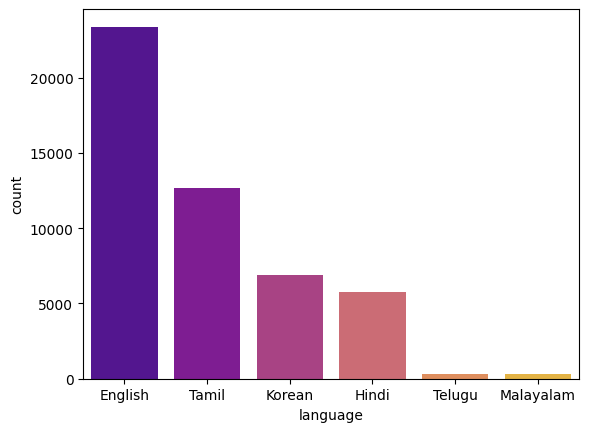

In [8]:
sns.barplot(data=st_lan,x="language",y="count",hue="language",palette="plasma")

Here we can see that there is a large number of english songs in this dataset

Top 10 Artist With Maximum Number of Songs (Solo) :

>This Artist may have more song in collaboration with others

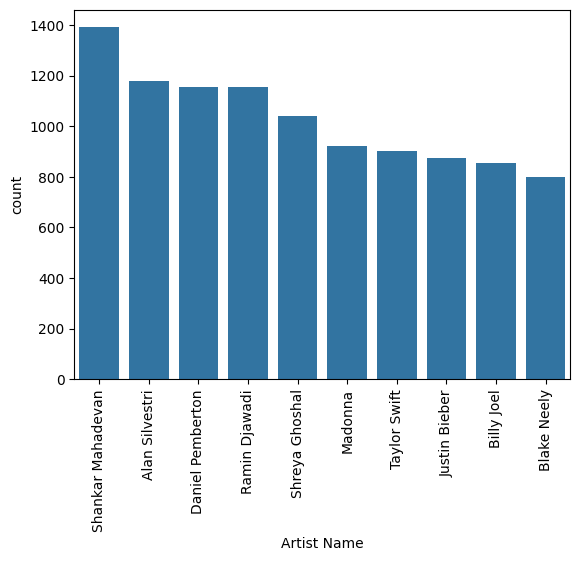

In [9]:
st_artist = st["artist_name"].value_counts().reset_index()
sns.barplot(data=st_artist.head(10),x="artist_name",y="count")
plt.xticks(rotation=90)
plt.xlabel("Artist Name")
plt.show()

univariate analysis of numerical data :

---



In [10]:
# numerical columns =popularity,acousticness,danceability, duration_ms ,energy , instrumentalness,  key , loudness, mode,
#speechiness, tempo,time_signature,valence

In [11]:
st['duration_min'] = st['duration_ms'] / 60000 # as millisecond is a large number turning it in minute will be a good feature scaling

In [12]:
# making a list of numerical columns
numerical_columns=['popularity','acousticness','danceability','duration_min' ,'energy','loudness','tempo','valence','speechiness']

In [13]:
def outliers_calculation(category): # a function for outlier calculation
   data = np.array(category)
   Q1 = np.percentile(data,25)
   Q3 = np.percentile(data,75)
   IQR = Q3 - Q1
   max_outliers = Q3 + 1.5 * IQR
   min_outliers = Q1 - 1.5 * IQR
   return max_outliers,min_outliers


def histplot_removing_outliers(list,df): #function for histploting
  fig,axes = plt.subplots(3,3,figsize=(20,10))
  for i,category in enumerate(list) :
    row = i//3
    column =i%3
    max_outliers,min_outliers = outliers_calculation(df[category])
    df_wo_outliers = df[(df[category]>min_outliers )&(df[category]<max_outliers)].reset_index(drop=True)
    sns.histplot(data = df_wo_outliers, x= category ,color='#FFA500',ax=axes[row,column])



def scatterplot(list,column_name,df,hue=None):
  m = len(list)
  fig,axes = plt.subplots(1,m,figsize=(20,5))
  for i,category in enumerate(list) :
    ax = sns.scatterplot(data = df, x= column_name ,y= category,hue= hue,palette = "plasma",ax=axes[i])
    if(i== m-1):
       ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    else:
       legend = ax.legend()
       legend.set_visible(False)



#Univariate analysis of numerical columns :

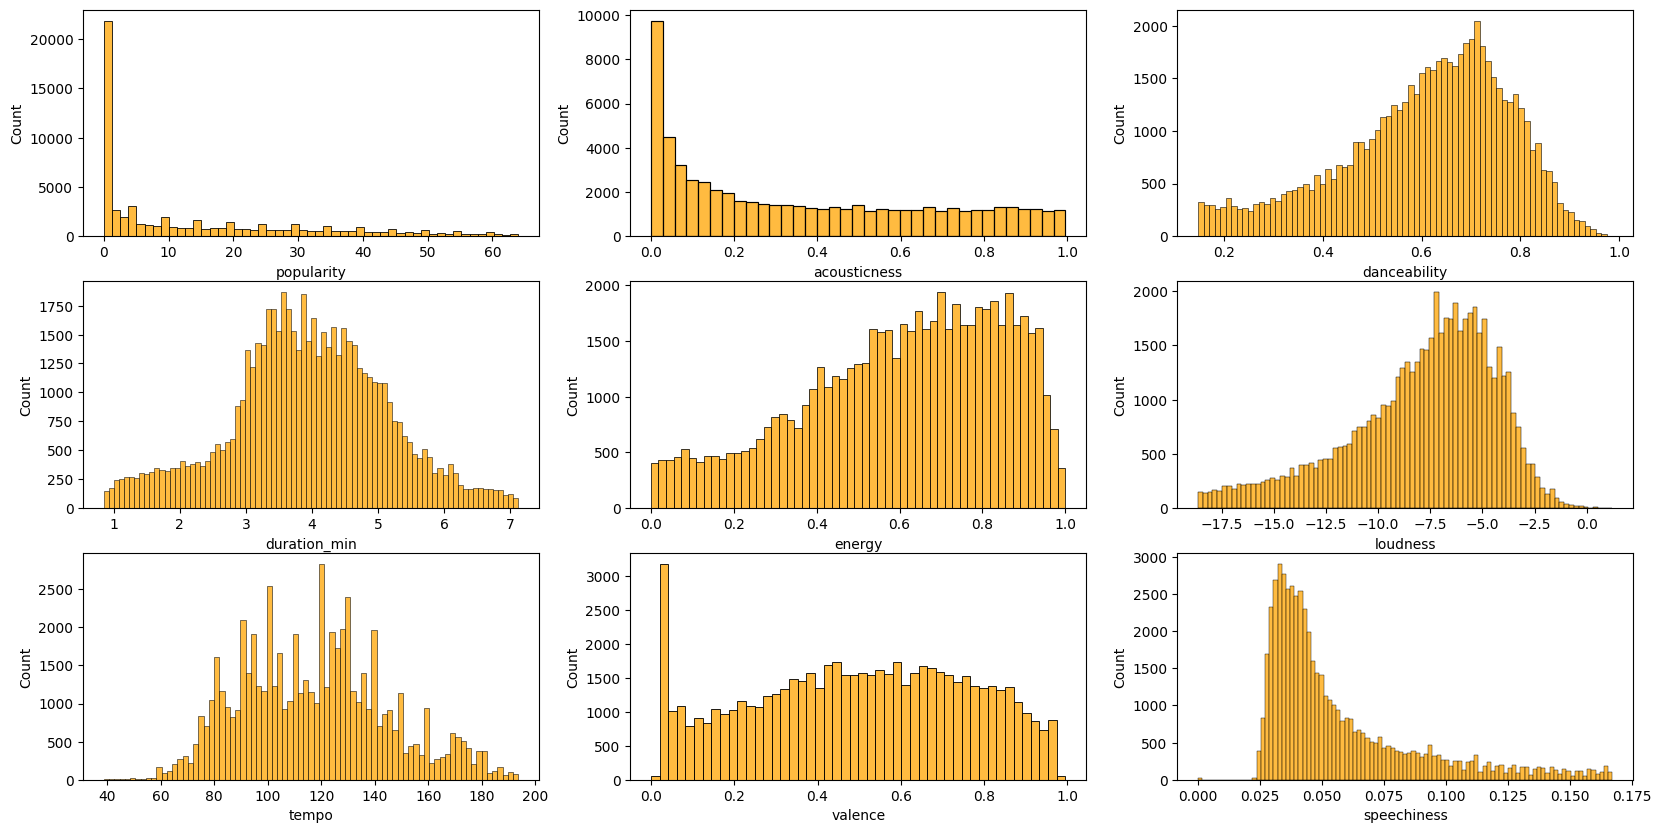

In [14]:
histplot_removing_outliers(numerical_columns,st)

1. popularity
* Explanation: This feature likely represents the popularity score of the tracks.

* Distribution: Highly right-skewed, or an exponential-like decay.

* Insight: The vast majority of tracks have a very low popularity score (close to 0). As popularity increases, the count of tracks drops off very sharply. This is common for popularity metrics, suggesting only a small fraction of the data set are highly popular hits.

2. acousticness
* Explanation: This score typically measures how acoustic a track is (e.g., probability that the track is an acoustic recording). Values range from 0.0 (least acoustic) to 1.0 (most acoustic).

* Distribution: Highly right-skewed, with a large peak near 0.0 and a long, gradual tail extending to 1.0.

* Insight: Most tracks in the dataset are not very acoustic (score near 0.0). There is a significant minority of tracks spread across the rest of the range, with relatively few being fully acoustic (score near 1.0).

3. danceability
* Explanation: This measures how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. Values range from 0.0 (least danceable) to 1.0 (most danceable).

* Distribution: Fairly left-skewed and somewhat symmetric, peaking around 0.7−0.8.

* Insight: The majority of tracks are moderately to highly danceable, with the peak occurring at a high value. Very few tracks are considered to have extremely low danceability (score near 0.0).

4. duration_min
* Explanation: The length of the track in minutes.

* Distribution: A relatively symmetric, bell-shaped distribution (looks somewhat like a Normal distribution) with a peak around 2.5−3.5 minutes.

* Insight: Most tracks have a standard length of about 2.5 to 3.5 minutes, which is typical for commercial songs. The distribution tails off on both the short and long ends.

5. energy
* Explanation: A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Values range from 0.0 to 1.0.

* Distribution: Left-skewed, with a peak around 0.8. The distribution shows a large and consistent count of tracks across the middle range (around 0.5 to 0.9).

* Insight: The tracks in this dataset tend to have moderate to high energy levels. Very low-energy tracks (score near 0.0) are less common.

6. loudness
* Explanation: The overall loudness of a track in decibels (dB), typically ranging from −60 dB to 0 dB. More negative values are quieter.

* Distribution: Strongly left-skewed, with a peak around −5 dB to −3 dB.

* Insight: The majority of tracks are relatively loud (closer to 0 dB, which is the less negative side of the scale). This suggests that many tracks in the dataset have been mastered to modern loudness standards. Very quiet tracks (highly negative values) are much less common.

7. tempo
* Explanation: The estimated overall tempo of a track in beats per minute (BPM).

* Distribution: Appears multi-modal (has multiple peaks). Clear high peaks are visible around 80 BPM, 100-110 BPM, and 120-130 BPM.

* Insight: The track tempos are not clustered around a single central value but instead show multiple typical tempo ranges, which could reflect the presence of different genres within the dataset (e.g., 80-90 BPM for Hip-Hop, 120-130 BPM for Dance/House).

8. valence
* Explanation: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).

* Distribution: Relatively uniform or spread out, with a slight tendency to peak near the moderate to high valence range (around 0.6 to 0.9).

* Insight: There is a diverse range of emotional tones in the dataset, though slightly more tracks tend to have a positive (higher valence) feel than a negative (lower valence) feel.

9. speechiness
* Explanation: Detects the presence of spoken words in a track. Higher values suggest more speech (e.g., podcasts, audiobooks, or rap music). Values range from 0.0 to 1.0.

* Distribution: Highly right-skewed, with a massive peak near 0.0 and a sharp drop-off.

* Insight: The overwhelming majority of tracks contain very little to no speech. Tracks with significant spoken-word content are rare in this dataset.

#Multivariate Analysis :

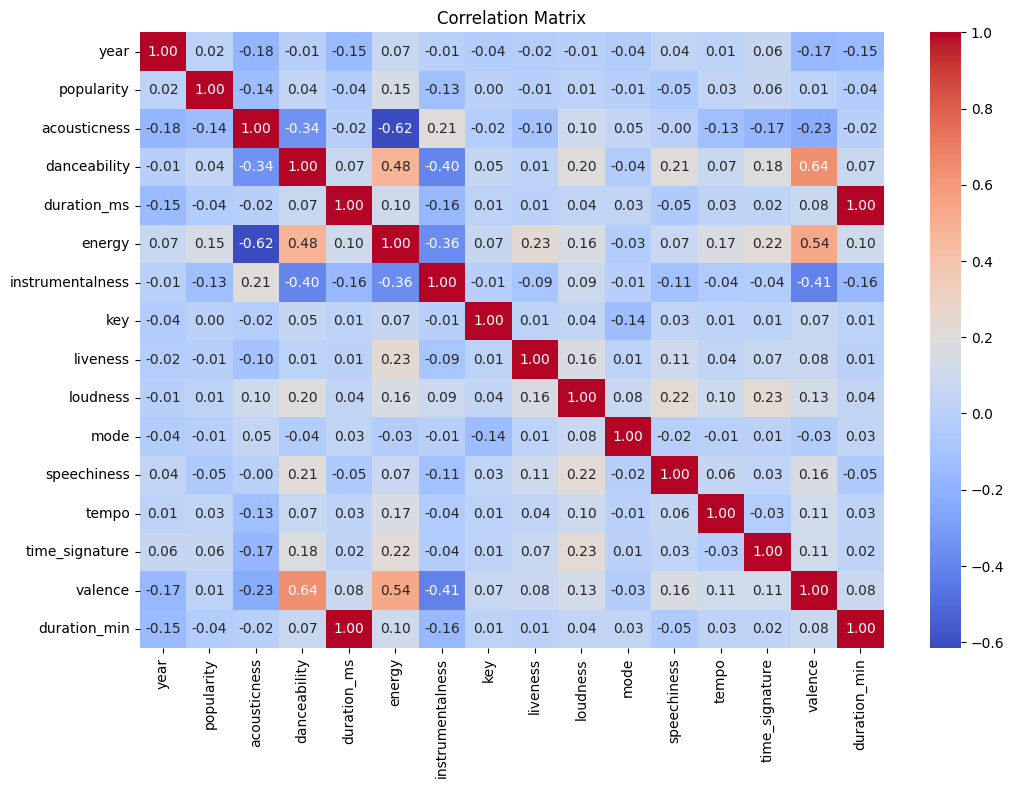

In [15]:
corr = st.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Tempo :
In music, tempo refers to the speed or pace of a piece of music — how fast or slow it is played.

It is usually measured in beats per minute (BPM).

Example: 60 BPM means 60 beats in one minute (1 beat per second).

120 BPM is twice as fast as 60 BPM.

Tempo can also be described with Italian terms:

In [16]:
# classifying according to the tempo :
conditions =[
             (st["tempo"]>=30) & (st["tempo"]<=66),
             (st["tempo"]>66) & (st["tempo"]<=76),
             (st["tempo"]>76)& (st["tempo"]<=108),
             (st["tempo"]>108) & (st["tempo"]<=120),
             (st["tempo"]>120) & (st["tempo"]<=168),
             (st["tempo"]>168)
             ]
choices = ["Largo(very slow)","Adagio(slow)","Andante(walking pace)","Moderato( moderate speed)","Allegro(fast)","Presto(very fast)"]
st["Italian_Terms"]= np.select(conditions,choices,default="unknown") # as a default unknown is given for songs with tempo <30


In [17]:
st["Italian_Terms"]

0        Moderato( moderate speed)
1                    Allegro(fast)
2                Presto(very fast)
3                Presto(very fast)
4                    Allegro(fast)
                   ...            
62312        Andante(walking pace)
62313    Moderato( moderate speed)
62314                Allegro(fast)
62315                 Adagio(slow)
62316        Andante(walking pace)
Name: Italian_Terms, Length: 62317, dtype: object

cleaning the invalid tempo score:

In [18]:
st_tempo = st[st["Italian_Terms"]!="unknown"] # removing some songs with unknown (<30)tempo score

In [19]:
st_tempo_vc = st_tempo["Italian_Terms"].value_counts().reset_index()

In [20]:
st_tempo_vc

Italian_Terms  count
0              Allegro(fast)  25055
1      Andante(walking pace)  21799
2  Moderato( moderate speed)   8565
3          Presto(very fast)   4098
4               Adagio(slow)   2058
5           Largo(very slow)    685

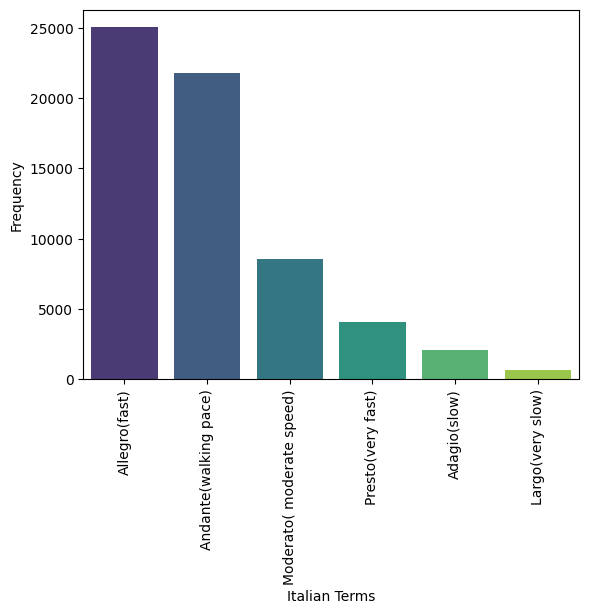

In [21]:
sns.barplot(data =st_tempo_vc, x= "Italian_Terms" ,y ="count",hue ="Italian_Terms",palette="viridis")
plt.xlabel("Italian Terms")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

We can see that very fast and slow and very large are less in number most are in fast walking pace and moderate pace

* Does tempo of a song  depends on a song's genre ?

In [22]:
st_fast_tempo = st[(st["Italian_Terms"]=="Presto(very fast)")].reset_index(drop=True)
st_fast_tempo = st_fast_tempo.sort_values(by="tempo",ascending=False)
st_fast_tempo = st_fast_tempo.reset_index(drop=True)

In [23]:
print(st_fast_tempo["track_name"].head(20))

0                       Hari Dada Theme
1             Bhoomi - Minimal Sessions
2                             I Can Fly
3                                Селяви
4     Yosichi Yosichi (From "Andhagan")
5                   Hung Up on Tokischa
6                       Surface Shimmer
7                  Sansaro Kasudahannyo
8                          Settai Theme
9          Settai Theme (From "Settai")
10                 Otame Oka Paatam Raa
11              Forrest Gump Main Theme
12              Forrest Gump Main Theme
13              Forrest Gump Main Theme
14              Forrest Gump Main Theme
15              Forrest Gump Main Theme
16                         Keep Digging
17                            Follow Me
18                       Strange Noises
19       Jughead Funeral / Betty Threat
Name: track_name, dtype: object


In [24]:
st_slow_tempo = st[(st["Italian_Terms"]=="Largo(very slow)")|(st["Italian_Terms"]=="Adagio(slow)")].reset_index(drop=True)
st_slow_tempo = st_slow_tempo.sort_values(by="tempo",ascending=False)
st_slow_tempo = st_slow_tempo.reset_index(drop=True)

In [25]:
print(st_slow_tempo["track_name"].tail(20))

2723                                        Gift Exchange
2724            Performing in Cuba as Precursor to Russia
2725                                          I'm Dreamin
2726                          Ode to Javed / Javed's Poem
2727                                             Platonic
2728    Back To The Future Part II: He's Gone - From "...
2729                                    What Has Happened
2730                               Even The Trees Hate Us
2731                                                 Rain
2732                                         THE HEIST V2
2733                                          Eeram Theme
2734                                Returning To The Park
2735                                     Slender Sickness
2736                                     Surah Al Kawthar
2737                              Hero - Background Score
2738    Intro to Billy the Kid - Live April 1972 At Si...
2739                                      Magical Habitat
2740          

In [26]:
st_moderato_tempo = st[(st["Italian_Terms"]=="Moderato( moderate speed)")|(st["Italian_Terms"]=="Andante(walking pace)")].reset_index(drop=True)
st_moderato_tempo = st_moderato_tempo.sort_values(by="tempo",ascending=False)
st_moderato_tempo = st_moderato_tempo.reset_index(drop=True)
print(st_moderato_tempo["track_name"].head(20))

0                       Unnai Ninaithen
1                  A La Hassan de Paris
2                        Man in a movie
3                        Man in a movie
4                    Donne Moi Ta Chose
5                     Lala Lala Sutrula
6                             O Vennila
7                             RUN (HAN)
8                  Harry Potter The Pet
9     Shendur Lal Chadhayo Ganesh Aarti
10                        Get the Spade
11                     Shamefaced Broad
12        Raamam Raaghavam (From "Rrr")
13                  Silu Silu Kanavukal
14        Raamam Raaghavam (From "Rrr")
15                          Mehki Mehki
16                   Shiv Tandav Stotra
17                        Mental Trauma
18      Vendi Terallo (From "Kalakaar")
19              Vaseegara - Future Trap
Name: track_name, dtype: object


From each column we got song tracks which fall into different genres such as:
* songs with fast tempo in data set generally falling into genre like pop/EDM/upbeat/Energetic
*  songs with slow tempo in data set are generally falling into romantic/devotional/soft electronic/hip-hop/sad/horror
* songs with moderate tempo in data set are generally falling into genre like rock/filmy orchestral / hip-pop/horror/devotional

>Though there is not perfect rule set for tempo in song genres but most of the case this is observed exception can happen such as filmy music can be slow in sad scene also fast in a chasing sequence .


#Relation of Tempo With Other Numerical Features :

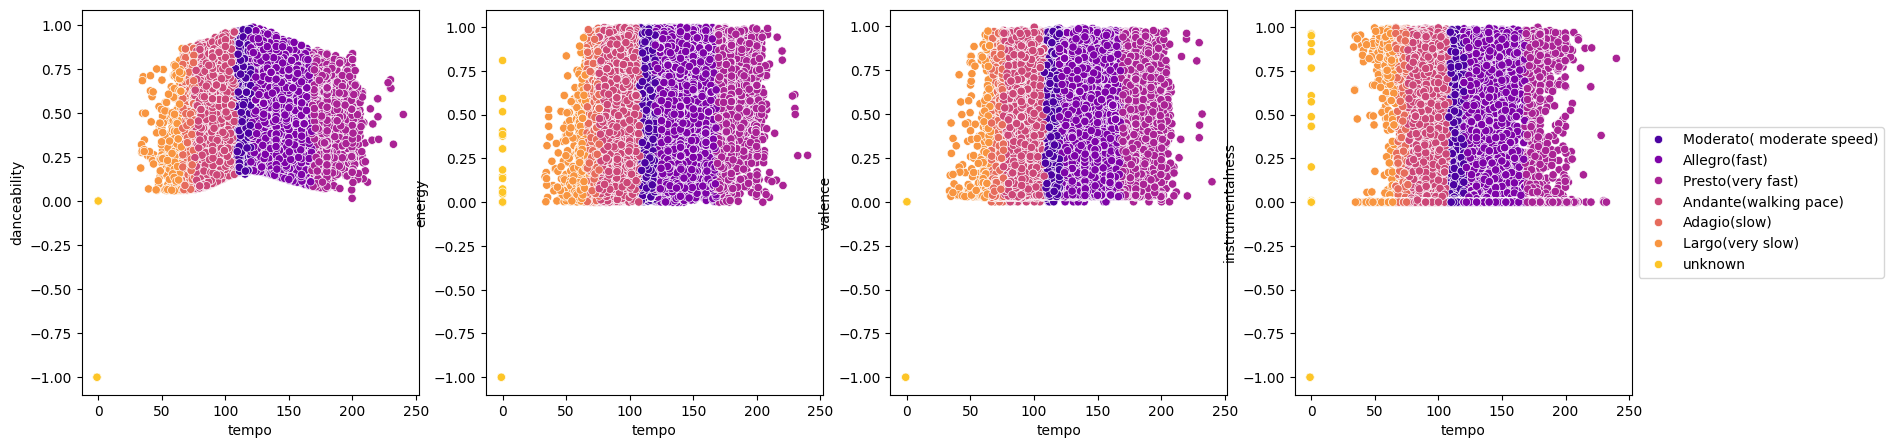

In [27]:
list1=["danceability","energy","valence","instrumentalness"]
scatterplot(list1,"tempo",st,"Italian_Terms")

1. Tempo and Danceability (First Plot)
*  Tracks with moderate tempos (around 60 to 180 BPM) tend to have the highest range and concentration of danceability scores (from about 0.2 to 1.0). Tracks with very slow or very fast tempos (below 60 or above 180 BPM) are generally less danceable, with scores starting to drop off. This makes sense, as extremely slow or fast music is typically harder to dance to.

2. Tempo and Energy (Second Plot)
* There is no clear linear or non-linear correlation between tempo and energy. The energy scores are distributed vertically across the entire tempo range.A track's tempo doesn't reliably predict its energy level. High-energy tracks (near 1.0) and low-energy tracks (near 0.0) can be found at virtually any tempo.

3. Tempo and Valence (Third Plot)
* Similar to energy, there is no clear correlation between tempo and valence (musical positivity/mood). Valence scores are spread across the entire tempo range.The mood (happiness or sadness) of a song appears to be largely independent of its tempo. A slow song can be happy (high valence), and a fast song can be sad (low valence).

4. Tempo and Instrumentalness (Fourth Plot)
*  Again, there is no clear correlation. Instrumentalness scores (0.0 for vocal, 1.0 for purely instrumental) are randomly distributed with respect to tempo.Instrumental music (high instrumentalness) and vocal music (low instrumentalness) are represented across all tempo ranges.



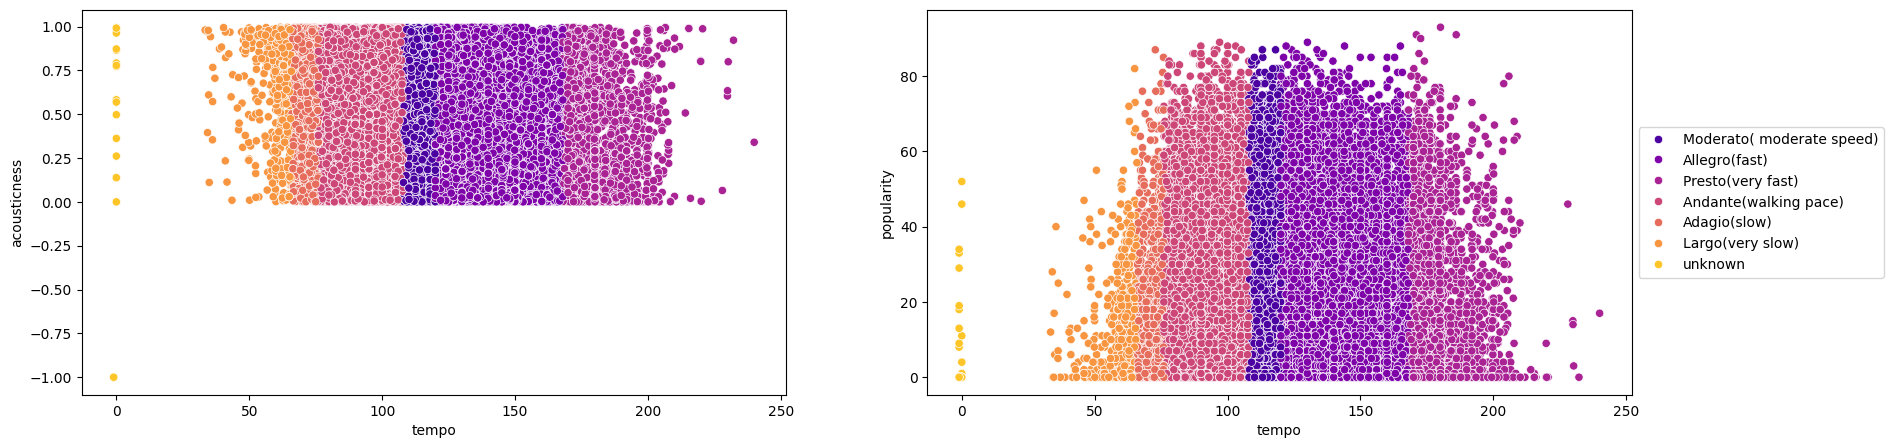

In [28]:
list2 =["acousticness","popularity"]
scatterplot(list2,"tempo",st,"Italian_Terms")

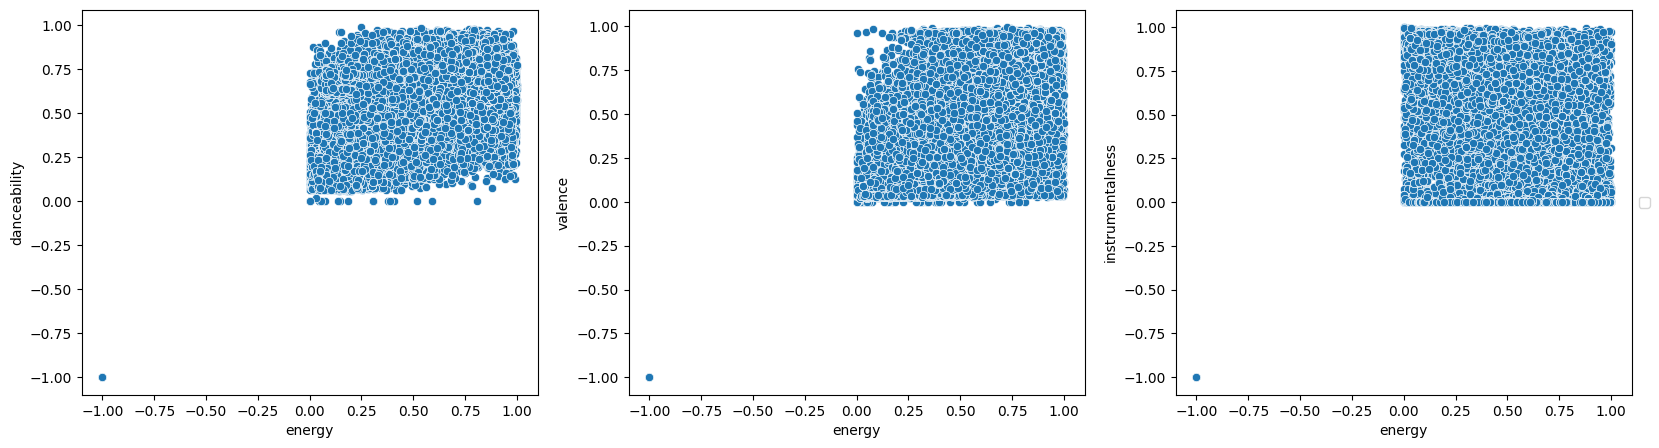

In [29]:
list3 = ["danceability","valence","instrumentalness"]
scatterplot(list3,"energy",st)

#Decades Most Popular Songs :

In [30]:
st["decade"] =( st["year"]//10)*10  # adding a extra column in dataset for decade
st["decade"]=st["decade"].astype(str)


In [31]:
st["decade"]=st["decade"]+"'s"

In [32]:
st_1970_song = st[st["decade"]=="1970's"].reset_index(drop=True) #all 1970's song
st_1980_song = st[st["decade"]=="1980's"].reset_index(drop=True) #all 1980's song
st_1990_song = st[st["decade"]=="1990's"].reset_index(drop=True) #all 1990's song
st_2000_song = st[st["decade"]=="2000's"].reset_index(drop=True) #all 2000's song
st_2010_song = st[st["decade"]=="2010's"].reset_index(drop=True) #all 2010's song
st_2020_song = st[st["decade"]=="2020's"].reset_index(drop=True) #all 2020's song

In [33]:
st_1970_song["popularity"].describe()

count    232.000000
mean      31.073276
std       19.409213
min        0.000000
25%       18.000000
50%       30.000000
75%       43.000000
max       83.000000
Name: popularity, dtype: float64

In [34]:
x,y = outliers_calculation(st_1970_song["popularity"])
print(f"{x} , {y}")

80.5 , -19.5


In [35]:
a1,b1 = outliers_calculation(st_1980_song["popularity"])
st_outliers_1980 = st_1980_song[st_1980_song["popularity"]>a1].reset_index(drop=True)

a2,b2 = outliers_calculation(st_1990_song["popularity"])
st_outliers_1990 = st_1990_song[st_1990_song["popularity"]>a2].reset_index(drop=True)

a3,b3 = outliers_calculation(st_2000_song["popularity"])
st_outliers_2000 = st_2000_song[st_2000_song["popularity"]>a3].reset_index(drop=True)

a4,b4 = outliers_calculation(st_2010_song["popularity"])
st_outliers_2010 = st_2010_song[st_2010_song["popularity"]>a4].reset_index(drop=True)

a5,b5 = outliers_calculation(st_2020_song["popularity"])
st_outliers_2020 = st_2020_song[st_2020_song["popularity"]>a5].reset_index(drop=True)


In [36]:
st_outliers = pd.concat([st_outliers_1980,st_outliers_1990,st_outliers_2000,st_outliers_2010,st_outliers_2020],axis=0)

In [37]:
st_outliers = st_outliers.reset_index(drop=True)

<Axes: xlabel='decade', ylabel='tempo'>

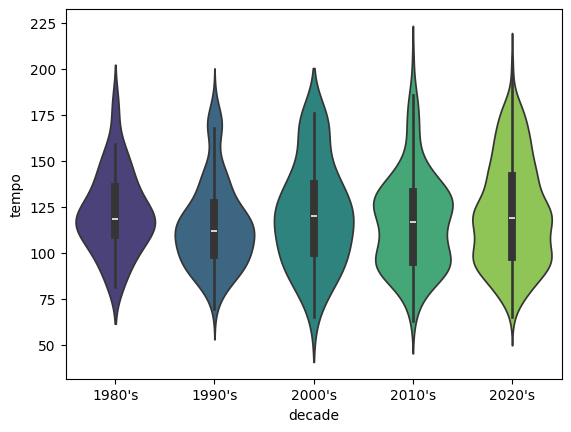

In [38]:

#Most popular songs of each decades and their comparisons of tempo
sns.violinplot(data = st_outliers,x="decade",y ="tempo",hue="decade",palette="viridis")

1. Consistent Median: The median tempo has hovered around 110 to 130 BPM for all five decades, suggesting that this range remains the most common speed for music.

2. Increased Range/Outliers: The vertical length of the "violin" (the range of tempos) is dramatically longer for the 2010's and especially the 2020's. This indicates that music produced recently covers a much wider spectrum of speeds, from very slow to very fast.



<Axes: xlabel='decade', ylabel='danceability'>

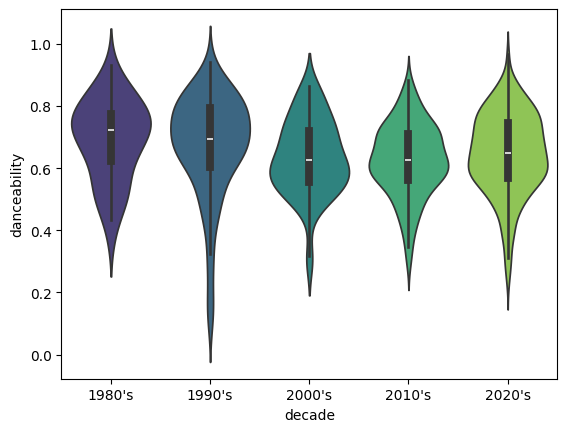

In [39]:
#most popular songs and their comparisons in danceability
sns.violinplot(data = st_outliers,x="decade",y ="danceability",hue="decade",palette="viridis")

1. Extreme Diversity in the 1990s and 2020s: These two decades show the longest tails, indicating that they produced the widest variety of music, from completely non-danceable (scores near 0.0) to maximum danceability (scores near 1.0).

2. Increased Focus on Mid-Range (2000s): The 2000s distribution is notable for avoiding the low end, suggesting that most music produced was at least moderately danceable.

3. Stability of Peak Danceability: For all decades, the music frequently reaches the highest danceability scores (near 1.0), which suggests the presence of highly dance-focused genres (e.g., electronic, pop, hip-hop) has been consistent over the 40-year period.

#Which type of songs are people mostly enjoying ?

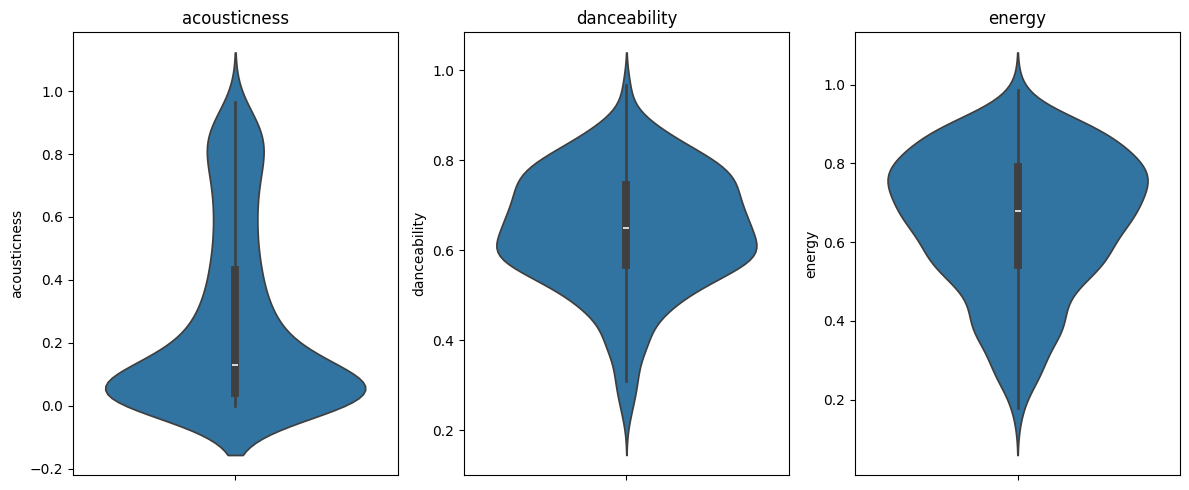

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

cols = ["acousticness", "danceability", "energy"]

for i, col in enumerate(cols):
    sns.violinplot(data=st_outliers_2020, y=col, ax=axes[i]) # st_outliers_2020 is the max outliers of popularity in 2020's decade
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


1.  In most popular songs of 2020's (till 2024)  very less amount of song have high acoustic score and also most of the songs have very low acoustic score.

2. Also in 2nd violin plot we can see that most of the songs have high and moderate danceability score. As upper half(above median) has more volumn that lower half(lower median)

3. In 3rd plot music in the dataset generally has high energy. The violin is widest in the upper range, indicating that a significant portion of the music has energy scores between 0.6 and 0.9. The distribution is much more even than acousticness, meaning the dataset contains a healthy mix of both lower-energy and higher-energy tracks, but the lean is towards the high end.

 * So we can say that songs which are getting popular most of them have low acoustics , high to moderate danceability and are highly energetic.
  
  * So for popularity one artist may focus on energetic ,less acoustic , danceable songs which are getting popular among people.




#Valence :

In [89]:
st["valence"].describe()

count    62317.000000
mean         0.495226
std          0.264787
min         -1.000000
25%          0.292000
50%          0.507000
75%          0.710000
max          0.995000
Name: valence, dtype: float64

<Axes: ylabel='valence'>

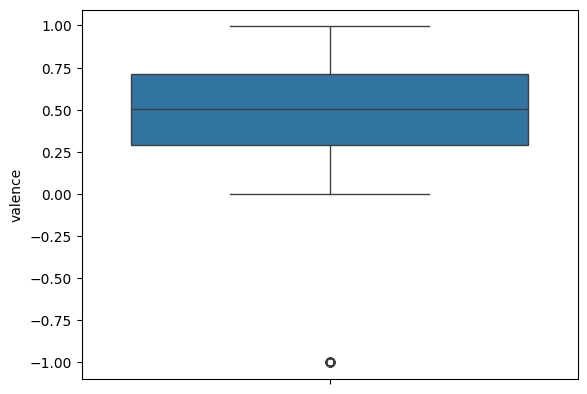

In [41]:
sns.boxplot(data=st,y="valence")

In [42]:
st_valence = st.sort_values(by="valence",ascending=False)
st_valence = st_valence.reset_index(drop=True)


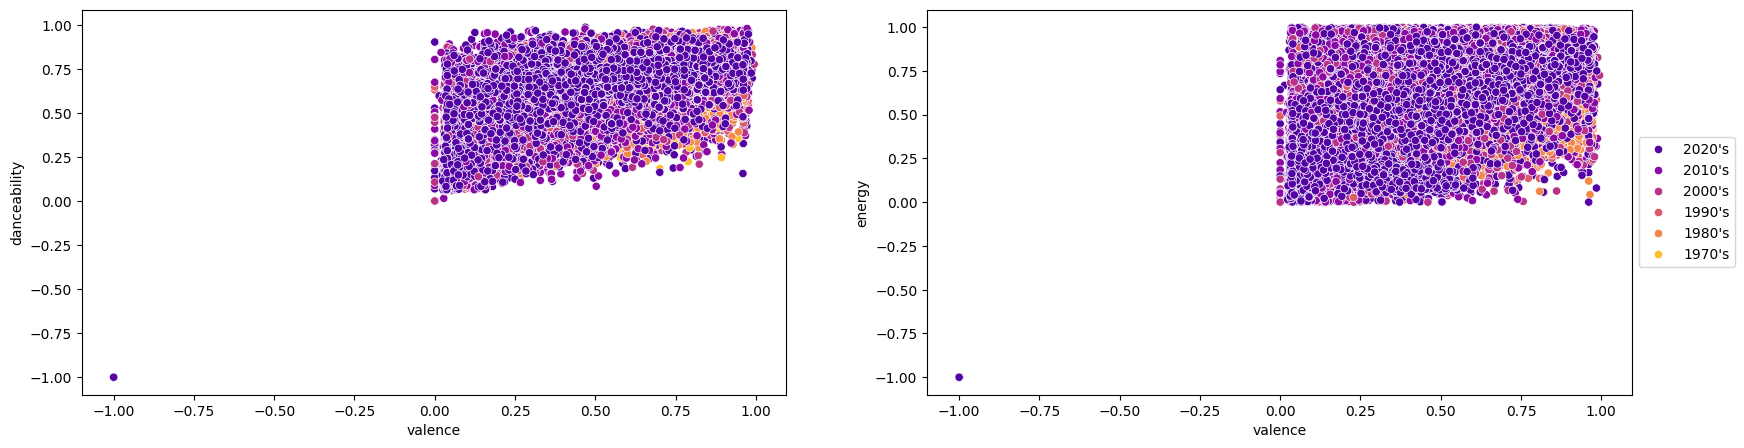

In [43]:
list1=["danceability","energy"]
scatterplot(list1,"valence",st,"decade")

* slightly upward trend is seen in danceability with valence score of the song . Not a strong correletion is observed but positive correlation is observed .
* In case of energy no trend is observed songs can be sad with high energy but at high valence score more songs cluster above 0.25

Some prominent artists in sad and happy song genre  in  2020's

In [44]:
st["valence"].describe()

count    62317.000000
mean         0.495226
std          0.264787
min         -1.000000
25%          0.292000
50%          0.507000
75%          0.710000
max          0.995000
Name: valence, dtype: float64

In [45]:
st_valence_2020 = st_outliers_2020.sort_values(by="valence",ascending=False) # 2020's most popular songs
st_valence_2020 = st_valence_2020.reset_index(drop=True)
st_valence_2020 = st_valence_2020[st_valence_2020["valence"]!= -1]


In [46]:
g = st_valence_2020.copy()
df_unique = g.drop_duplicates(subset="track_name") # removing songs with same track name


In [47]:
st_sad_valence_artist = df_unique["artist_name"].tail(300)
st_sad_valence_artist = st_sad_valence_artist.reset_index(drop=True)
st_sad_song = st_sad_valence_artist.value_counts().reset_index()

st_happy_valence_artist = df_unique["artist_name"].head(300)
st_happy_valence_artist = st_happy_valence_artist.reset_index(drop=True)
st_happy_song = st_happy_valence_artist.value_counts().reset_index()


In [48]:
st_happy_song

artist_name  count
0                                    Taylor Swift     48
1                                      Stray Kids     19
2                                       SEVENTEEN     15
3                                         ENHYPEN     14
4                                           TWICE     14
..                                            ...    ...
98             AP Dhillon, Gurinder Gill, Intense      1
99         Black Eyed Peas, Shakira, David Guetta      1
100                  Asal Kolaar, Anand Kashinath      1
101       Arijit Singh, Neeti Mohan, Rashmi Virag      1
102  Sushin Shyam, Hanumankind, Vinayak Sasikumar      1

[103 rows x 2 columns]

In [49]:
st_sad_song

artist_name  count
0                   Taylor Swift    101
1                     The Weeknd     12
2                        ENHYPEN     11
3                            BTS     11
4                     Stray Kids      8
..                           ...    ...
94                       Rihanna      1
95  Taylor Swift, Gary Lightbody      1
96         Madonna, Rob Simonsen      1
97   Justin Bieber, benny blanco      1
98       Taylor Swift, Ice Spice      1

[99 rows x 2 columns]

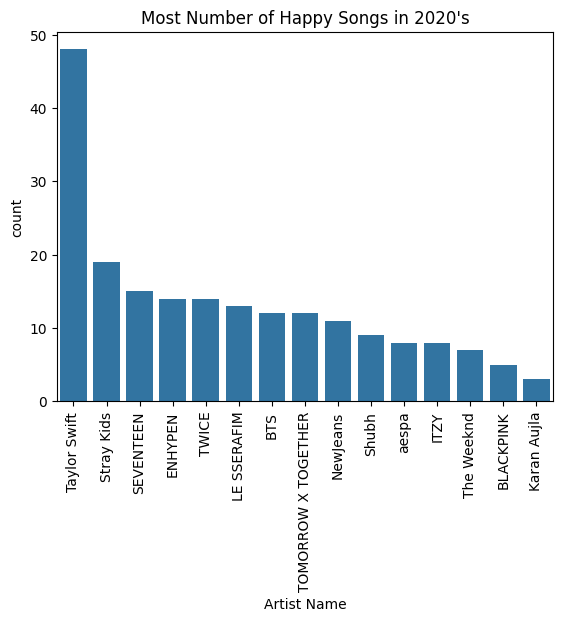

In [50]:
sns.barplot(data = st_happy_song.head(15),x="artist_name",y="count")
plt.xticks(rotation=90)
plt.title("Most Number of Happy Songs in 2020's")
plt.xlabel("Artist Name")
plt.show()

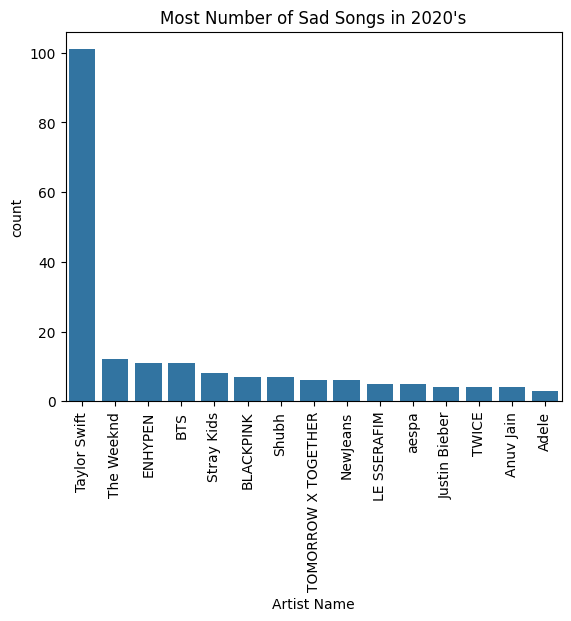

In [51]:
sns.barplot(data = st_sad_song.head(15),x="artist_name",y="count")
plt.xticks(rotation=90)
plt.title("Most Number of Sad Songs in 2020's")
plt.xlabel("Artist Name")
plt.show()

1. Overwhelming Dominance by Taylor Swift
Taylor Swift stands out as the artist with the highest count of sad songs, reaching 101.

* Her count is significantly higher than all other artists combined, reinforcing her position as the most prolific producer of "sad" music (likely based on low valence scores) in this dataset for the 2020s.

2. Steep Drop-Off to the Second Tier
*There is a drastic reduction in count after Taylor Swift. The next group of artists—The Weeknd, ENHYPEN, and BTS—all cluster closely with counts around 12-13 songs.

* This indicates that while many artists contribute sad songs, Taylor Swift's volume of output in this category is an extreme outlier.

3. Consistency Among the Majority
* The majority of the artists listed, from Stray Kids down to Adele and Anuv Jain, have very low and similar counts, generally falling between 3 and 9 songs.

* This suggests that for most major artists, sad songs constitute a small, relatively consistent, and minor part of their overall discography for the 2020s.

4. Strong K-Pop Representation
* The list features a significant number of K-Pop groups, including ENHYPEN, BTS, Stray Kids, BLACKPINK, NewJeans, LE SSERAFIM, aespa, and TWICE.


* Artists in Both Top 15: Several artists appear in the top 15 for both happy and sad songs, indicating a diverse emotional range in their output: Taylor Swift, ENHYPEN, BTS, Stray Kids, BLACKPINK, TWICE, Shubh, TOMORROW X TOGETHER, NewJeans, and LE SSERAFIM.

* Artist Consistency: The artists with the most consistently high output for happy songs (Stray Kids, SEVENTEEN, ENHYPEN) generally have a lower count of sad songs, suggesting a more consistently upbeat sound profile.

**Conclusion**:
The data clearly indicates that Taylor Swift is the most prolific artist for both happy and sad songs among this selection of artists in the 2020s, with a significantly higher volume of sad songs. Beyond her, the distribution suggests:

* There is a greater overall volume of sad songs compared to happy songs produced by the top-ranked artists.

* K-Pop acts tend to dominate the top ranks of the Happy Songs chart, suggesting their output is often classified with a higher valence.

* Artists like The Weeknd and Adele appear to specialize more in sad/low-valence music, as they are ranked high or exclusively on the Sad Songs chart.

What type (sad/happy) songs people are listening most (based on popularity not individual opinion):

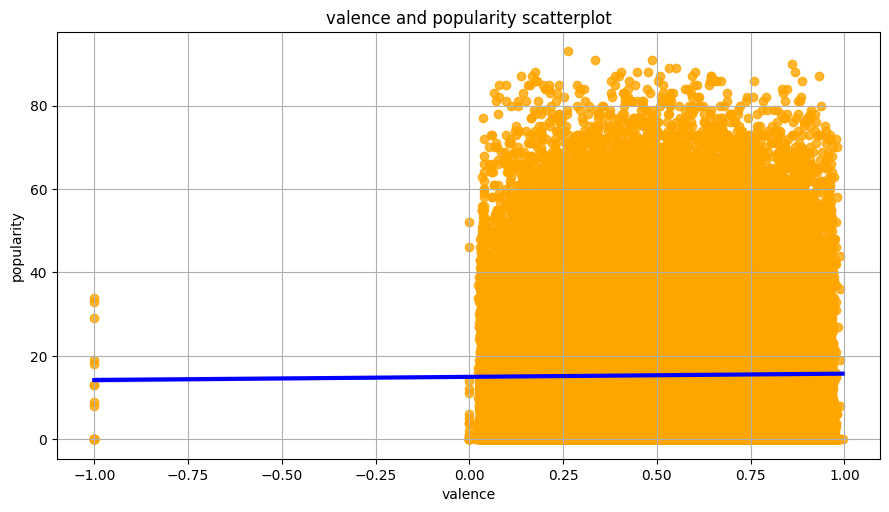

In [52]:
plt.figure(figsize=(9,5))

sns.regplot(data=st, x='valence', y='popularity',line_kws={"color": "blue", "linewidth": 3},scatter_kws={"color": "orange"})
plt.grid(True)

plt.tight_layout()

plt.title('valence and popularity scatterplot')
plt.show()

* Not a perfect correlation is observed songs with high value of valence as well as low valence are getting same popularity

In [53]:
df_valence = st[st["valence"]!=-1].reset_index(drop=True)

In [54]:
df_valence = df_valence.sort_values(by="year",ascending=True).reset_index(drop=True)

<Axes: xlabel='decade', ylabel='valence'>

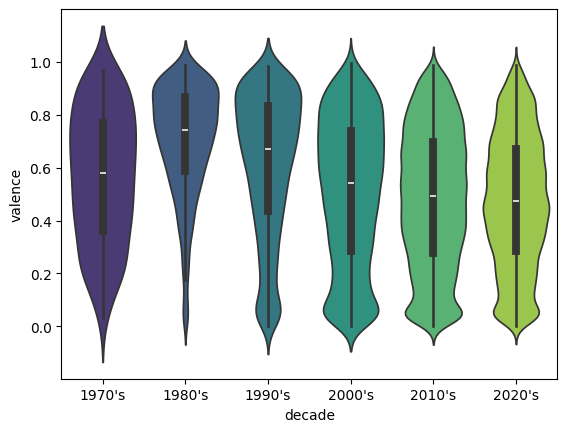

In [55]:
# let's do this observation decade wise :
sns.violinplot(data = df_valence,x="decade",y ="valence",hue="decade",palette="viridis")

1. General Trend: A Gradual Decrease in Valence
* The most striking insight is the overall downward trend in the median valence from the 1970s to the 2020s.

* 1980's: Has the highest median valence (around 0.65−0.7). The distribution is wide, with a lot of songs clustered in the happier range.

* 2020's: Has the lowest median valence (around 0.5).

* Insight: This suggests most songs music has generally become less cheerful and more subdued or melancholic over the last five decades.

2. Shifting Distribution: The Rise of Neutral/Melancholy Music
The shape of the violins provides detail on how the mood has changed:

* 1970's and 1980's: The distributions are relatively symmetrical or slightly skewed towards higher valence, with a significant amount of music having a valence above 0.8.

* 1990's to 2010's: The distributions become slightly more concentrated around the median, and the width starts to taper more sharply towards the higher valence end, indicating fewer extremely happy songs.

* 2020's: The distribution is still wide, but the concentration of data (where the box and median are) has clearly shifted lower, with a much smaller proportion of extremely high-valence tracks compared to the 70's.

* Insight: While music with all types of moods still exists, the "average" song is becoming less overtly joyful. This could be due to changes in production style, genre popularity (e.g., the rise of darker electronic music or introspective hip-hop/pop), or a reflection of broader cultural moods.

3. Consistency of Median Valence in Recent Decades
* While there's a clear long-term decrease, the median valence appears relatively consistent in the 1990's, 2000's, and 2010's (all hovering around the 0.5−0.6 range), before dipping lower in the 2020's.

* Insight: This suggests the shift away from the peak cheerfulness of the 70's/80's primarily happened in the 90's, and then the average mood settled into a more neutral or slightly positive-to-neutral range for a few decades before the latest dip.

4. The 1980's Outlier
* The violin for the 1980's is the narrowest at the extreme low-valence end (below 0.2).

* Insight: This suggests that compared to all other decades, the 1980s had the fewest extremely sad or angry tracks in its popular music landscape. While its median is slightly lower than the 70's, its lack of very low-valence songs makes its overall range perhaps less emotionally diverse at the extremes than the decades that follow.

> This means that most songs that are produced are getting less cheerful but on the other hand in popularity scatterplot we observe a flat regression line . Which means popularity is not influenced by cheerfulness or sadness of the songs.
This also indicates versatile music taste of song listeners. so **valence** is not a factor for **popularity**

Is valence has any dependencies on key of songs ?

In [56]:
conditions = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F',
    6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}
conditions =[
    df_valence["key"]==0,
    df_valence["key"]==1,
    df_valence["key"]==2,
    df_valence["key"]==3,
    df_valence["key"]==4,
    df_valence["key"]==5,
    df_valence["key"]==6,
    df_valence["key"]==7,
    df_valence["key"]==8,
    df_valence["key"]==9,
    df_valence["key"]==10,
    df_valence["key"]==11
]
choices = [ 'C', 'C#','D', 'D#','E', 'F','F#', 'G', 'G#', 'A', 'A#', 'B']
df_valence["key_char"] = np.select(conditions,choices,default="0")

In [57]:
df_valence[df_valence["key_char"]=='0'] # no column with not defined key character

Empty DataFrame
Columns: [track_id, track_name, artist_name, year, popularity, artwork_url, album_name, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, track_url, language, duration_min, Italian_Terms, decade, key_char]
Index: []

[0 rows x 26 columns]

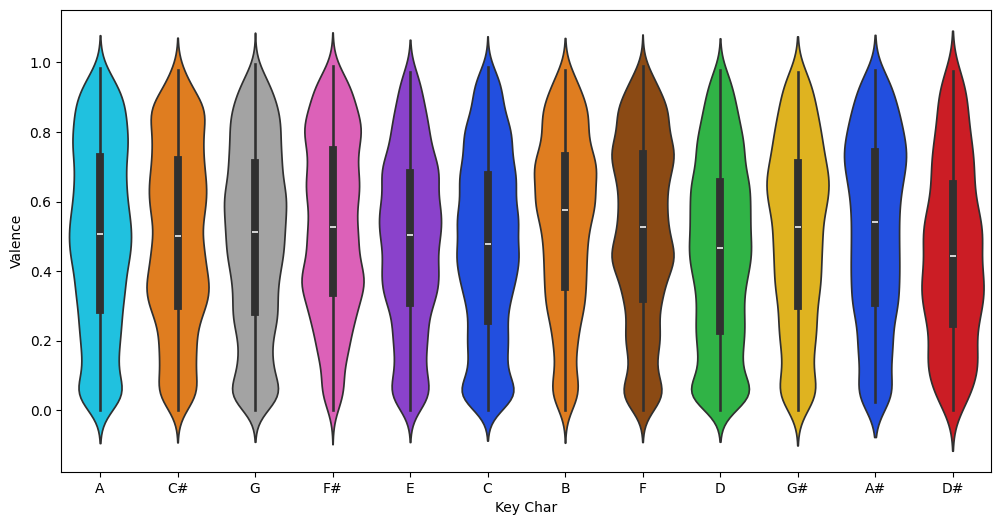

In [58]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df_valence,x="key_char",y="valence",hue="key",palette="bright",legend=None)
plt.xlabel("Key Char")
plt.ylabel("Valence")
plt.show()

>the data shows that Valence is highly variable across all musical keys. While the average valence is fairly consistent across keys, the distribution and range of valence are so broad that one cannot definitively conclude that any single key is significantly "happier" or "sadder" than the others based on this plot.

#Language :

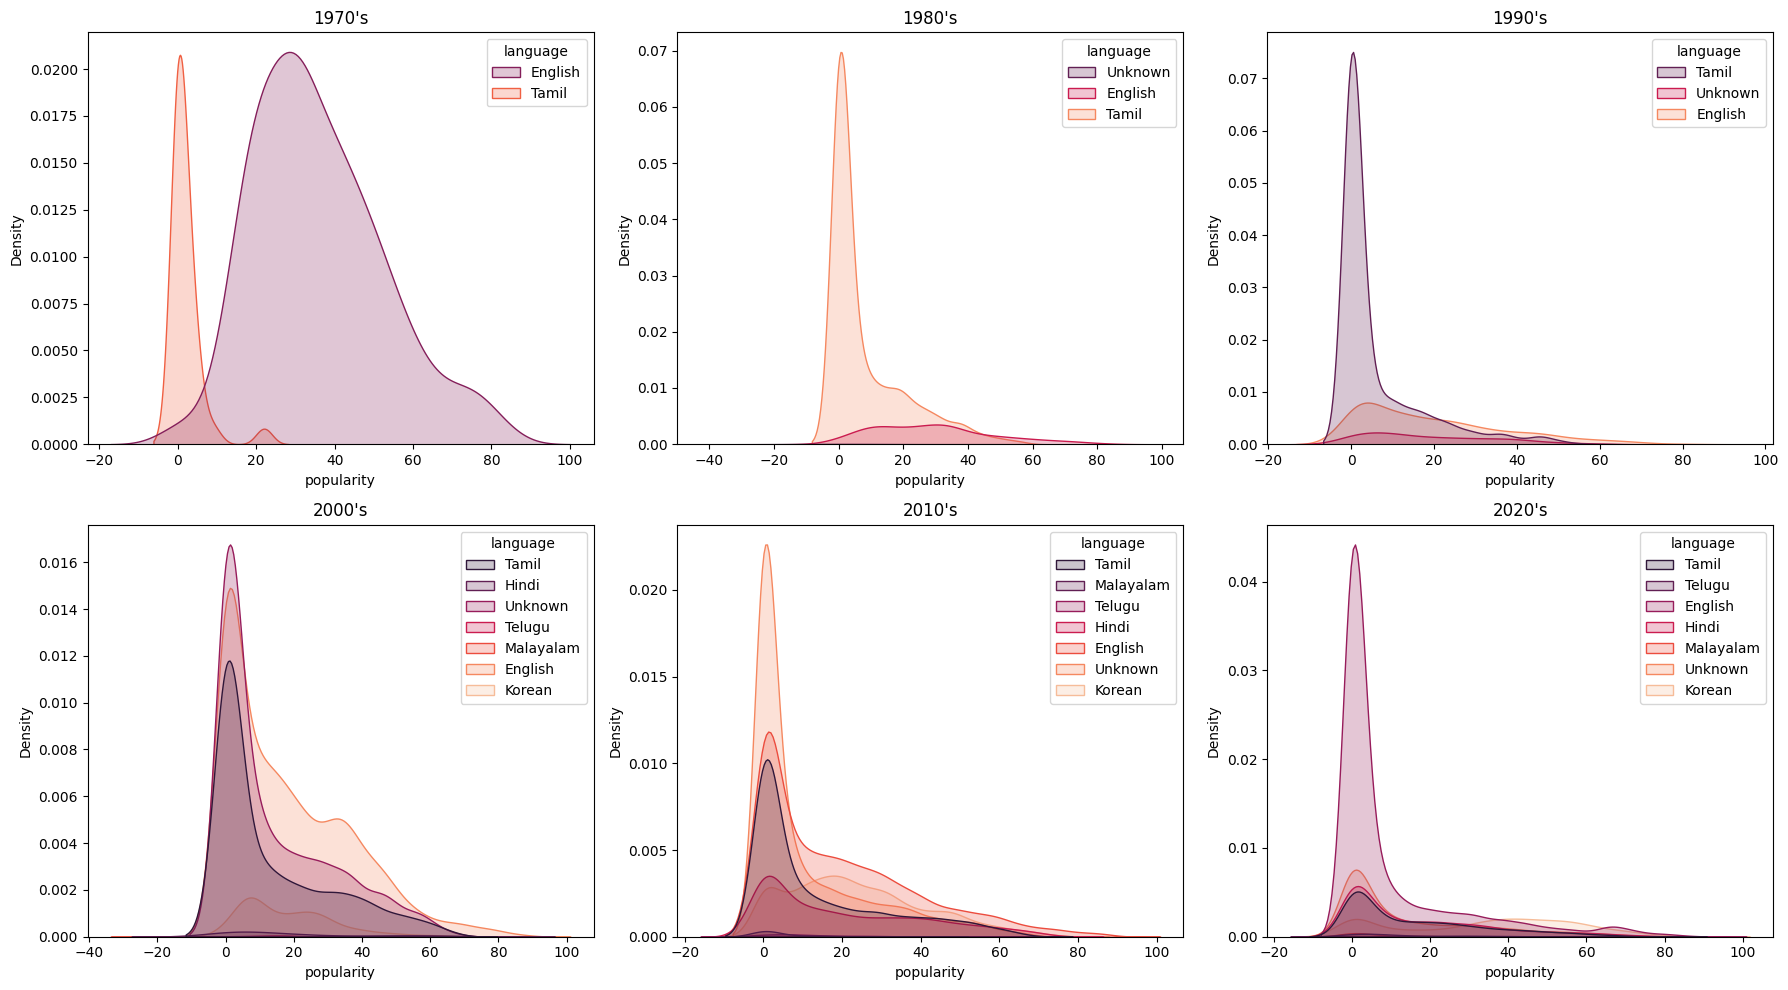

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))

cols = [st_1970_song,st_1980_song,st_1990_song,st_2000_song,st_2010_song,st_2020_song]

for i, col in enumerate(cols):
    row = i//3
    column = i%3
    sns.kdeplot(data=col ,x=col['popularity'],hue="language",palette="rocket",fill=True, ax=axes[row][column])
    m=col['decade'][0]
    axes[row][column].set_title(m)

plt.tight_layout()
plt.show()


1. 1970s

* Languages: English, Tamil.

* Observation:

* English songs have a wider spread of popularity, peaking around mid-range.

* Tamil songs are less popular overall, very sharp peak at lower popularity

Insight: English dominated the popularity charts in 1970s. Tamil music existed but had smaller audience reach (lower popularity values).

2. 1980s

* Languages: Tamil, English, Unknown.

* Observation:

* Tamil songs peak sharply at low popularity.

* English songs have a long tail, some songs very popular.

* Unknown language entries appear, possibly mislabeled data.

Insight: English songs continue to dominate high popularity. Tamil still mostly low popularity.

3. 1990s

* Languages: Tamil, English, Unknown.

* Observation:

* Sharp peaks at very low popularity for Tamil.

* English has more spread, tailing toward higher popularity.

Insight: English music maintains strong performance. Tamil is still mostly low popularity but more songs start to appear (broader distribution than 1970s).

4. 2000s

* Languages: Tamil, Hindi, English, Telugu, Malayalam, Korean, Unknown.

* Observation:

* Diversity of languages increases.

* English continues to have high popularity tail.

* Tamil and Hindi mostly concentrated at low–mid popularity.

Insight: Globalization & wider music availability — more languages enter the dataset. English songs still dominate top popularity, regional languages mostly low-medium popularity.

5. 2010s

* Languages: Tamil, Hindi, English, Telugu, Malayalam, Korean, Unknown.

* Observation:

* English songs still have high popularity, some Indian languages (Hindi, Tamil) gaining mid-popularity.

* korean appears (likely K-pop influence).

Insight: Increasing diversity, global music influence, some regional languages gaining traction.

6. 2020s

* Languages: Tamil, Hindi, English, Telugu, Malayalam, Korean, Unknown.

* Observation:

* English and Korean songs dominate higher popularity.

* Indian languages mostly low–mid popularity but more visible.

Insight: Global dominance of English and K-pop; regional music still important but mostly moderate popularity.

🔹 General Trends

Language diversity increases over decades.

English songs consistently have higher popularity.

Regional Indian languages (Tamil, Hindi, Telugu, Malayalam) mostly peak at low–medium popularity but gain slightly over time.

Korean music appears after 2000s, increasing density at higher popularity in 2010s–2020s.

Distribution shape:

English: flatter and longer tail → more highly popular songs.

Tamil / Hindi: sharp peaks → most songs are less popular.

In [60]:
# User Define Function for Finding Top Most Popular artists :
def top_most_popular_artists(df,lang,list_decade):
  m=len(list_decade)
  fig,axes = plt.subplots(1,m,figsize=(20,5))
  fig.suptitle(f"Top 15 Artists of Most Popular Songs in {lang} in {list_decade} decades", fontsize=16)
  for i,cols in enumerate(list_decade):
    st_decade = df[df["decade"]==cols]
    st_lang_artists = st_decade[st_decade["language"]== lang]
    df_lang_artists = st_lang_artists.groupby(["artist_name","decade"])["popularity"].median().sort_values(ascending = False)
    df_lang_artists = df_lang_artists.reset_index()
    sns.barplot(data = df_lang_artists.head(15), x="artist_name",y="popularity",hue="artist_name",palette="plasma",legend=False,ax=axes[i])
    axes[i].set_xticklabels(df_lang_artists.head(15)["artist_name"], rotation=90)
    axes[i].set_xlabel("Artist Name")
    axes[i].set_ylabel("Popularity")


#English Artists Analysis of [ "1980's","1990's"] :

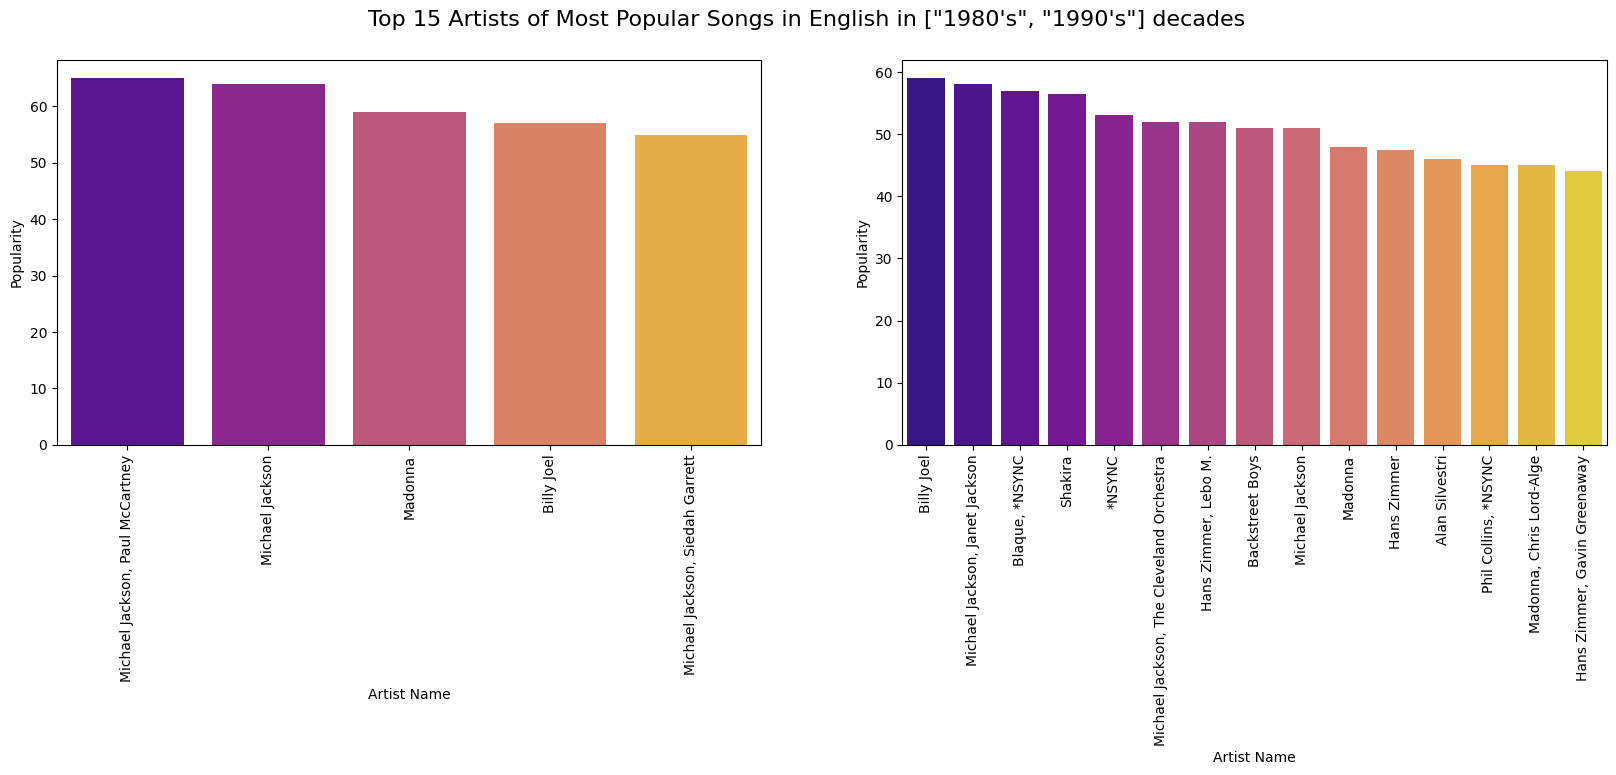

In [61]:
list_decade2 = ["1980's","1990's"]
top_most_popular_artists(st_outliers,"English",list_decade2)

**Overlap in Top Artists:**

 * Michael Jackson (both solo and in collaborations) appears multiple times and is highly ranked on both charts, underscoring his lasting impact across both decades.

* Madonna also appears in the top tier of both charts, confirming her status as one of the most popular artists of the era.

**Insights from the 1980's :**

* Close Competition at the Top: The top two entries, Michael Jackson, Paul McCartney and Michael Jackson (solo), have virtually identical, highest popularity scores (both over 60), highlighting their immense and nearly equal popularity in the aggregated timeframe.

* Clear Drop-off: There's a noticeable drop in popularity score between the second-ranked Michael Jackson and the third-ranked Madonna (from over 60 to just under 60), and another drop to Billy Joel and Michael Jackson, Sliedah Garrett.

**Insights from the 1990's :**
  * Dominance of Early-to-Mid 90s Artists: Artists like Billy Joel, Michael Jackson, Janet Jackson, Shakira, and Blaque are highly ranked.

* Boy Band and Pop Presence: The inclusion of *NSYNC (multiple times, once solo and once with Blaque), and Backstreet Boys confirms the significant popularity of pop music and boy bands in the 1990s.

* Soundtrack/Classical Influence: The appearance of The Cleveland Orchestra, Lebo M, and multiple entries for Hans Zimmer points to a high popularity for songs associated with soundtracks (likely The Lion King given Lebo M's inclusion and the time frame). This indicates that non-traditional pop artists, particularly those from film music, secured top spots.

* Narrow Popularity Range: For the top artists on this chart, the popularity scores are very tightly clustered, with the top 15 artists all scoring between approximately 59 and 45. The competition is much closer than in the combined chart, especially among the top 10.


In [62]:
st_most_popular_2010_2020 = pd.concat([st_outliers_2010,st_outliers_2020],axis=0).reset_index(drop=True)


In [63]:
st_popular_lang = st_most_popular_2010_2020["language"].value_counts().reset_index()
st_popular_lang = st_popular_lang[st_popular_lang["language"]!="Unknown"]

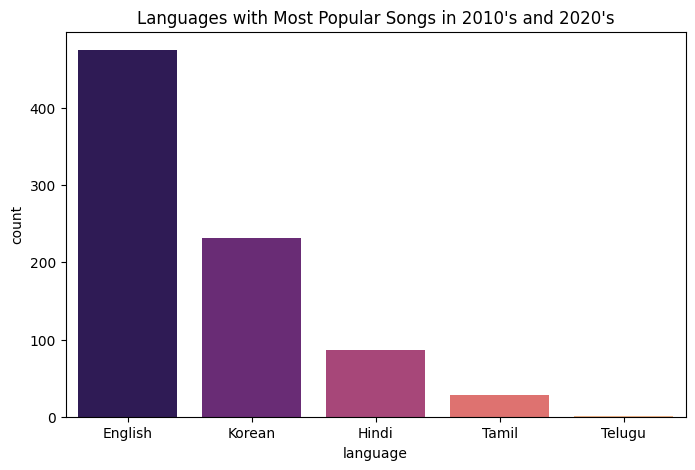

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(data=st_popular_lang,x="language",y="count",hue="language",palette="magma")
plt.title("Languages with Most Popular Songs in 2010's and 2020's")
plt.show()

**Let's go with Top Three popular song languages in recent decades** :

#English Artists Analysis

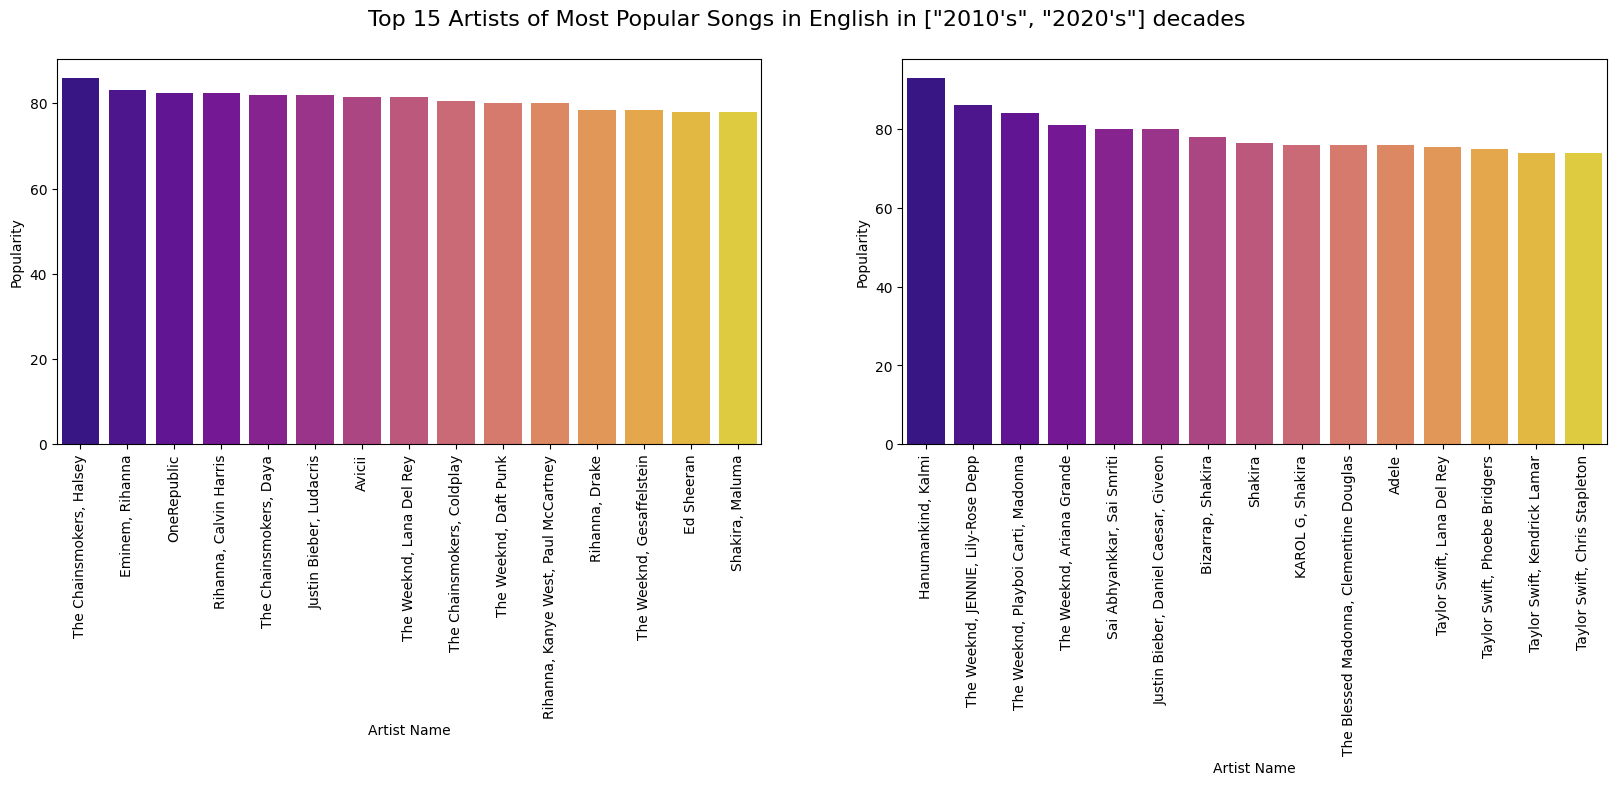

In [65]:
list_decade3 = ["2010's","2020's"]
top_most_popular_artists(st_outliers,"English",list_decade3)

**Insights from the "2010's" Decades Chart (Left):**

*Electronic/Dance-Pop Focus::*
The presence of The Chainsmokers (topping the chart), Calvin Harris, and Daft Punk highlights the significant popularity of Electronic Dance Music (EDM) and dance-pop in the 2010s.

Strong Collaborations: Many top entries are collaborations, showing the importance of joint projects in achieving peak popularity:

* The Chainsmokers, Halsey

* Eminem, Rihanna

* Rihanna, Calvin Harris

* Justin Bieber, Ludacris

* The Weeknd, Daft Punk

* Rihanna, Kanye West, Paul McCartney

**High and Narrow Popularity Scores:**
The top artists all have popularity scores above 78, indicating extremely tight competition at the peak of the chart. The difference between the number one and number fifteen artist is only nearly 5 points.

**Insights from the "2020's" Decades Chart (Right)**
New Global and Diverse Artists: The chart features artists like HanumanKind, Kalmi, Sai Abhyankar, and Sal Smriti, suggesting a greater influence of global, possibly non-traditional English-language markets, or new digital-first artists achieving high popularity.

* **K-Pop and Global Pop Influence:** The appearance of JENNIE (with The Weeknd and Lily-Rose Depp) and KAROL G (with Shakira) indicates the growing and mainstream success of artists from K-Pop and Latin Pop scenes in English-language music popularity.

* **Continuation of Pop/R&B:** Artists like Ariana Grande, Giveon, and Shakira (who also appeared in the 90s chart) maintain strong relevance in the 2020s.

* **Clustered Mid-Popularity:** The majority of the artists in the middle and bottom of the list (from The Blessed Madonna down to Taylor Swift, Kendrick Lamar) are very tightly grouped, all scoring around the 77 to 75 range.


**Comparison of the Decades (2010s vs. 2020s)**
Shifting Dominance: While The Chainsmokers and Rihanna dominate the top of the combined "2010's" chart, the "2020's" chart is led by HanumanKind and Kalmi, followed closely by The Weeknd (with JENNIE and Lily-Rose Depp).

*The Weeknd's Longevity:*
 The Weeknd is a dominant artist across both charts, appearing in multiple entries in the "2010's" chart (solo, with Lana Del Rey, and with Daft Punk) and even more prominently in the "2020's" chart (in three of the top ten entries). This demonstrates his sustained popularity across the two decades.

*Rihanna's 2010s Success:* Rihanna is highly ranked in the "2010's" chart, appearing three times in the top 15 (solo, with Eminem, and with Calvin Harris), but her presence is notably absent from the very top of the "2020's" chart.

*Taylor Swift's Ascendance (or Late 2020s Success):* Taylor Swift appears multiple times at the lower end of the "2020's" top 15 (solo, with Phoebe Bridgers, and with Kendrick Lamar), indicating a strong wave of popularity in the early-to-mid 2020s, despite not reaching the absolute top position. She is absent from the "2010's" top 15 shown.

>**Observaton:** In 1990's and 1980's the median popularity score of artists are nearly < 60 or slightly high . But in 2010's and 2020's in recent decades median popularity score of artists are nearly 80 or > 80 .
This also indicates:

 * Internet accessibility and influence of social media platfroms causes songs of different to be reached between large number of people.

 * Also increase in populatin can be a reason.

#Hindi Artists Analysis

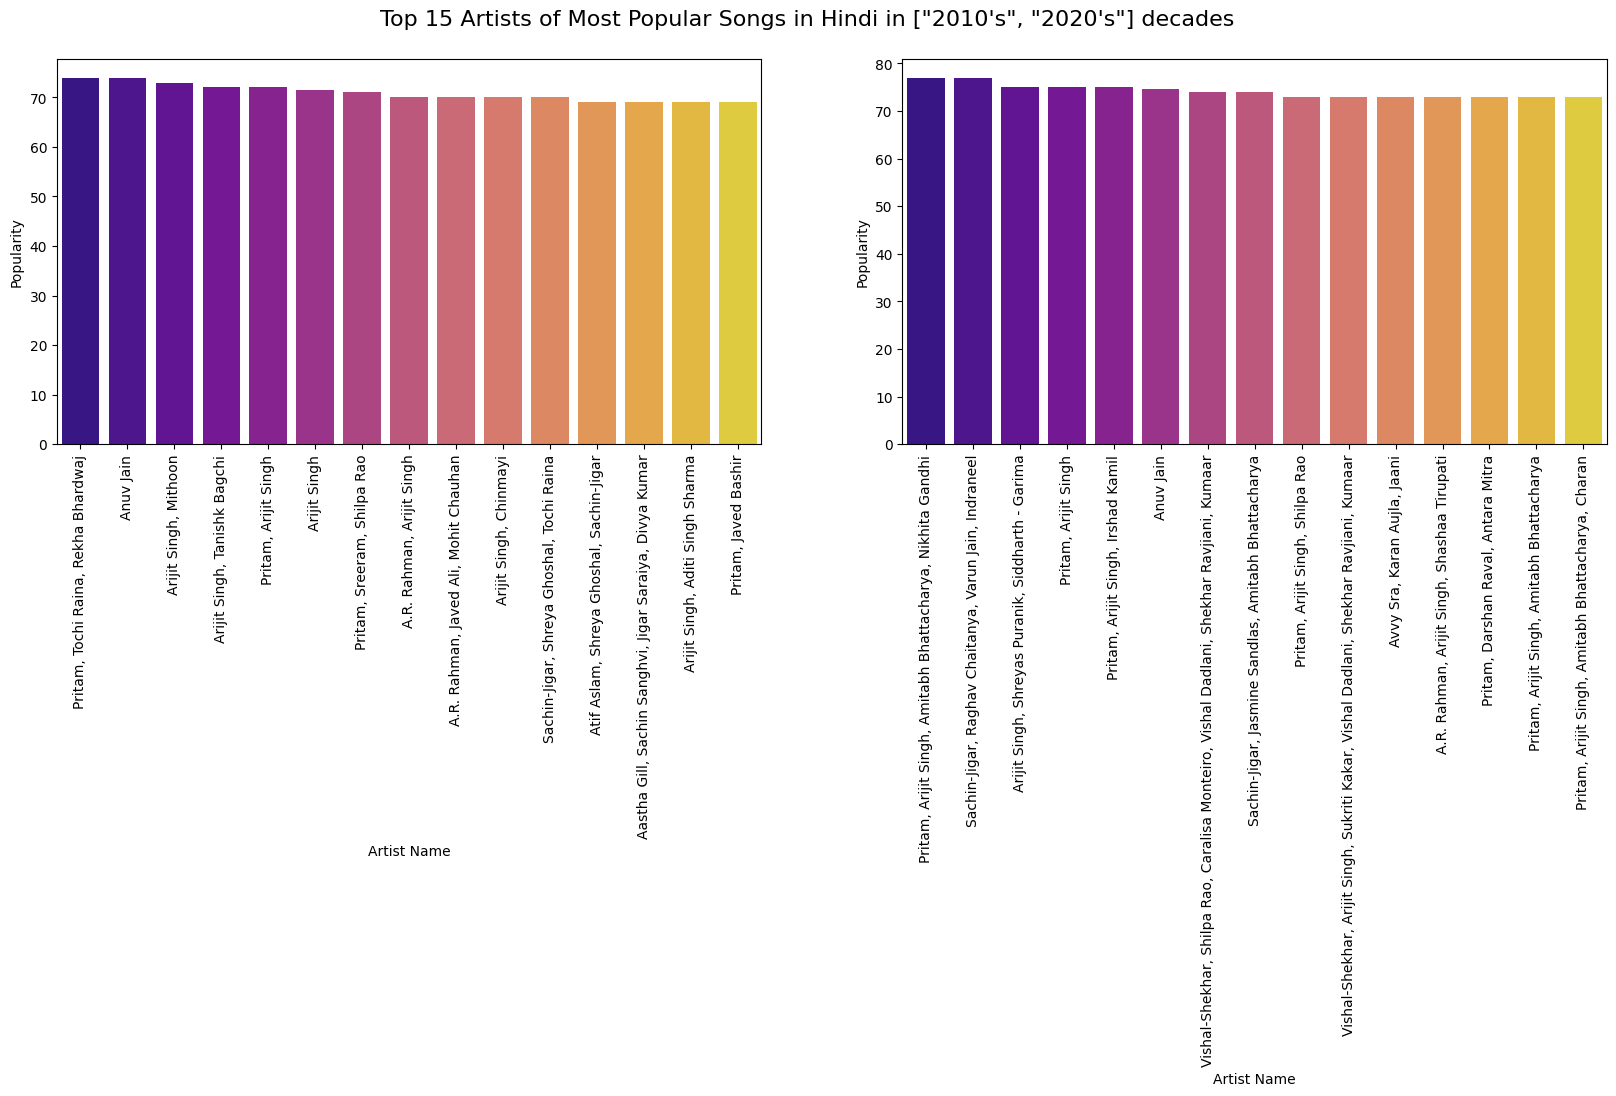

In [66]:

top_most_popular_artists(st_outliers,"Hindi",list_decade3)

**Insights from the "2010's" Decades Chart (Left)**:

* Top-Heavy with Pritam/Anuv Jain: The top two entries, Pritam, Tochi Rana, Rekha Bhardwaj and Anuv Jain, have identical, highest popularity scores (both over 70), indicating an extremely close race for the most popular song.

* The Rise of Independent/Non-Film Music: The inclusion of Anuv Jain (a prominent independent artist) in the second-highest spot is a significant insight, suggesting that non-film music began to achieve popularity levels comparable to Bollywood tracks in the 2010s.

* Diversity in Vocals: The chart features a good mix of established singers like A.R. Rahman, Mohit Chauhan, Shilpa Rao, Shreya Ghoshal, and emerging artists.

* Tight Popularity Cluster: The top 15 entries are tightly packed, with all scores falling between approximately 71 and 67.

**Insights from the "2020's" Decades Chart (Right)**:

* Absolute Dominance by Pritam/New Artists: The top three entries are all very close and feature Pritam, followed by another Pritam entry and HanumanKind, Kalmi (who were also highly ranked in the English 2020s chart, suggesting crossover success or a broad platform ranking methodology).

**New Collaborative Teams:** The "2020s" chart features a host of new collaborative names compared to the 2010s:

* Sachin-Jigar, Amitabh Bhattacharya, Nikita Gandhi

* Arijit Singh, Shreyas Puranik, Siddharth - Garima

* Avvy Sra, Karan Aujla, Jaani

* Darshan Raval, Antara Mitra

**Continued Crossover Success:** The recurrence of artists like HanumanKind and Kalmi strongly suggests that the ranking methodology is likely cross-platform (e.g., streaming) and captures the popularity of music in English and Hindi simultaneously, reflecting the borderless nature of digital music consumption.


**Dominant Trends Across Both Decades (2010s & 2020s)**:

**Pritam's Undisputed Reign:** Pritam is the most dominant figure across both decades. He appears in the number one or number two position in both charts and is featured in a vast majority of the top 15 entries for both the "2010s" (left chart) and the "2020s" (right chart). This indicates his status as the most popular and prolific composer/artist in Hindi film music for this entire period.

**Arijit Singh's Consistency:** Arijit Singh is the most prominent male vocalist. He appears multiple times in both charts, often with Pritam (e.g., "Pritam, Arijit Singh"), confirming his position as the leading voice of the era.

**The Importance of Duos and Collaborations:** The charts overwhelmingly feature collaborations, often listing the composer first, followed by vocalists or other collaborators. For example:

* Pritam, Tanishk Bagchi

* Sachin-Jigar, Shreya Ghoshal, Sachin-Jigar

* Vishal-Shekhar, Shilpa Rao, Caralisa Monteiro, Vishal Dadlani

> **Observation**:This structure confirms that modern Hindi music popularity is driven by composer-vocalist-lyricist teams, rather than single solo artists.

**Composer-Singer Pairs:** The frequent pairing of Pritam with Arijit Singh and Sachin-Jigar with various vocalists suggests powerful and successful hit-making partnerships.

#Korean Artist Analysis :

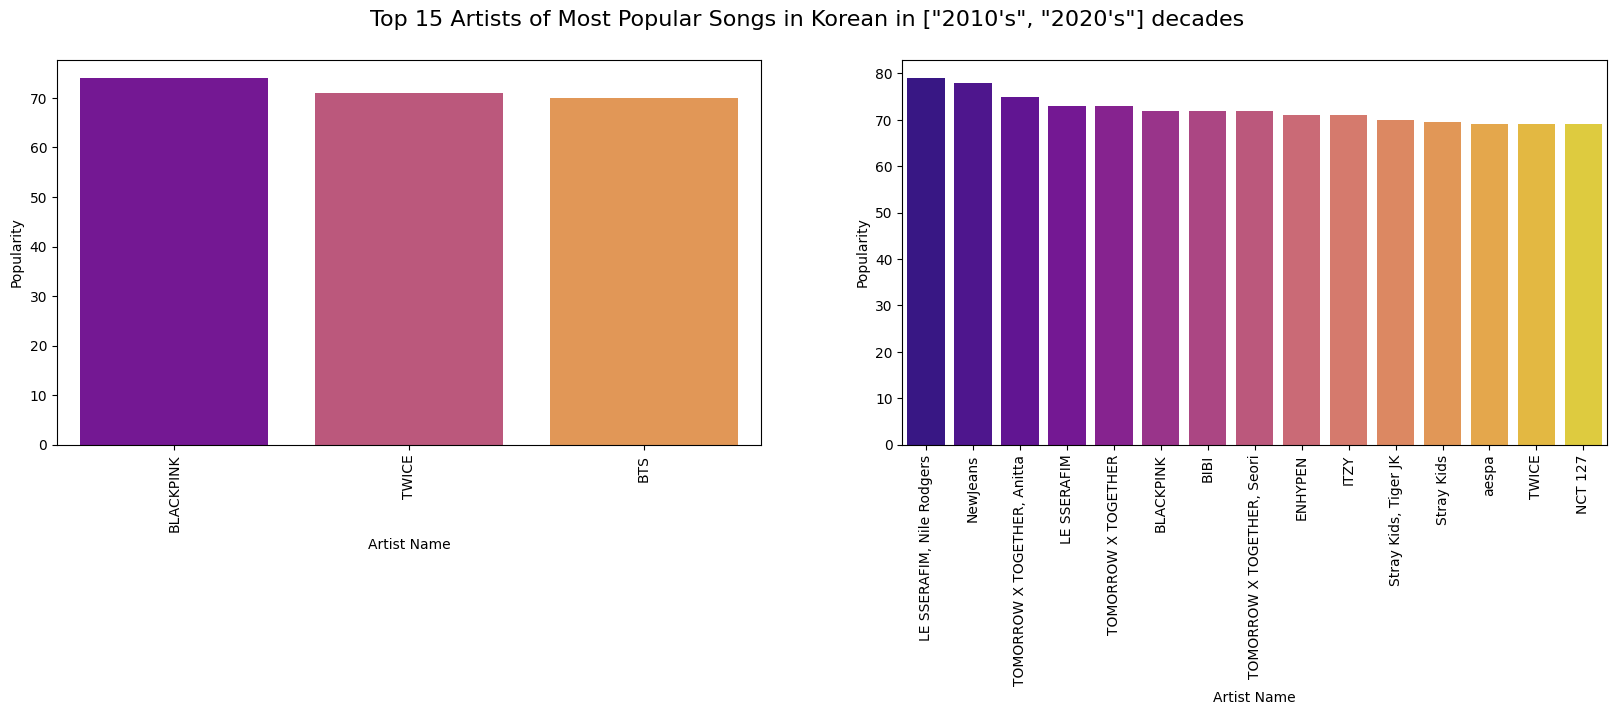

In [67]:

top_most_popular_artists(st_outliers,"Korean",list_decade3)

**Dominant Trends in Korean Pop (K-Pop)**:

**Girl Group/Boy Group Dynamics:** Both charts are entirely dominated by K-Pop groups, specifically the most globally recognized ones. The success of Korean music in these decades is clearly driven by structured, often highly choreographed, idol groups.

**Global Megastars (2010s & 2020s Combined):** The combined chart on the left highlights the sheer dominance of the three biggest global K-Pop acts: BLACKPINK, TWICE, and BTS. Their popularity scores are extremely high (all near or above 70), showing they are in a league of their own when aggregating the two decades.

**The "Big 3" Competition:** BLACKPINK is narrowly the most popular artist in the aggregated "2010s" and "2020s" decades, slightly edging out TWICE and BTS. This suggests their collective global impact is immense.

**Insights from the "2020's" Decades Chart (Right)**:

* The Rise of the 4th Generation: The "2020's" chart is largely populated by groups that debuted in the late 2010s or early 2020s, collectively known as the 4th Generation of K-Pop.

* NewJeans is ranked second, showcasing their massive, near-instant success.

* LE SSERAFIM (in the top spot with Nile Rodgers) and aespa are also highly ranked, confirming the significant power of new, dominant girl groups.

* TOMORROW X TOGETHER (TXT) also features multiple times, confirming the strength of the new generation of boy groups.

> Collaboration as a Popularity Driver: The top-ranked entry is a collaboration: LE SSERAFIM, Nile Rodgers. This indicates that high-profile Western collaborations are a successful strategy for achieving peak popularity in the 2020s.



**Analysis of signature of some prominent Artists  :**

In [68]:
st_artist_arijit_anuv = st[(st["artist_name"]=="Arijit Singh")|(st["artist_name"]=="Anuv Jain")].reset_index(drop=True)

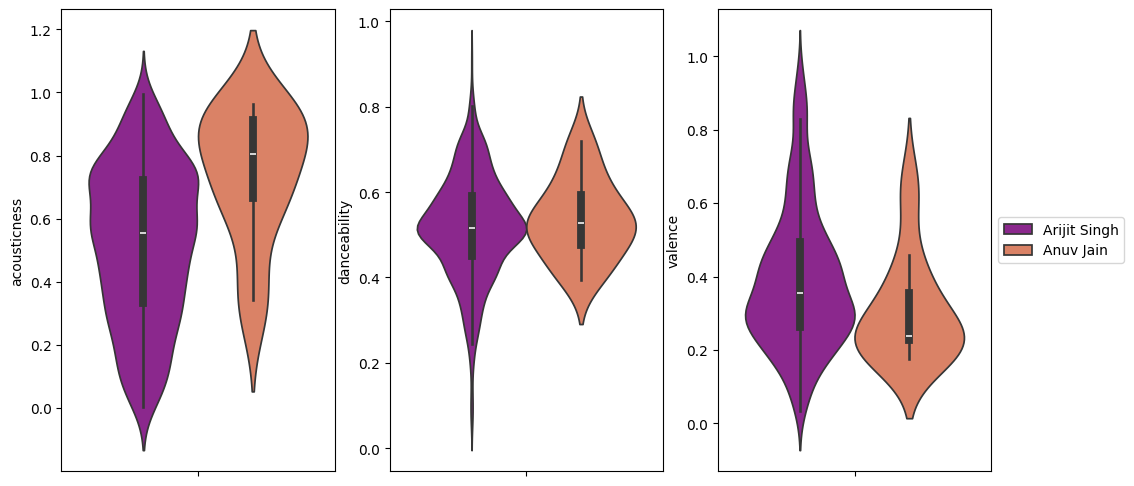

In [69]:
list1 = ["acousticness","danceability","valence"]
fig, axes = plt.subplots(1, 3, figsize=(12,6))
for i,cols in enumerate(list1):
  ax = sns.violinplot(data = st_artist_arijit_anuv , y =cols ,hue="artist_name",palette="plasma",ax=axes[i])
  if(i==2):
       ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
  else:
       legend = ax.legend()
       legend.set_visible(False)


**Acousticness**:

* Higher Median for Anuv Jain: The median (the horizontal line inside the box) for Anuv Jain is slightly higher than for Arijit Singh (around 0.6 to 0.7 vs. 0.5 to 0.6).

* Wider Range for Arijit Singh: The violin plot for Arijit Singh is notably wider at the top (near 1.0) and has a longer tail towards 0.0. This suggests that while Arijit Singh produces many songs with high acoustic properties, his overall output has a much broader range of acoustic diversity, including fully electronic or non-acoustic tracks, and very high acoustic tracks.

* Concentrated High Acousticness for Anuv Jain: The plot for Anuv Jain is more concentrated in the middle-to-high range (0.4 to 1.0), which aligns with his reputation for producing acoustic, guitar-driven, independent music.

**2. Danceability**

* Similar Medians: Both artists have very similar median danceability scores, slightly below 0.6.

* Similar Distribution: The overall distribution shape is comparable, centered around the 0.5 to 0.6 range. This indicates that both artists generally produce music with a moderate level of rhythm and tempo that is neither overwhelmingly designed for club dancing nor purely slow balladry.

* Extreme Values: Both artists have tracks with near-zero danceability (very slow/ballads) and tracks approaching 1.0 (highly danceable).

**3.Valence**
* valence (a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track, with 1.0 being very positive/happy and 0.0 being very negative/sad) show the most significant difference:

* Higher Median and Range for Arijit Singh (Happier):

* The median valence for Arijit Singh (around 0.3) is higher than for Anuv Jain (around 0.2).

* The violin plot for Arijit Singh is much wider in the high-valence range (near 1.0). This suggests that Arijit Singh, whose career includes a vast number of Bollywood songs, sings a greater variety of upbeat, positive, or happy tracks.

**Concentrated Low Valence for Anuv Jain (Sadder):**

* The distribution for Anuv Jain is heavily concentrated at the lower end (below 0.5), with a lower median and a narrow profile towards 1.0. This is a strong indicator that Anuv Jain's popular songs are predominantly melancholic, sad, or low-energy in their emotional tone.



➡ So Arijit Singh's songs can be sad but....

    there is real pain ,in the songs of Anuv Jain

#Loudness :

In [70]:
st_loudness=st[st["loudness"]!=-100000]

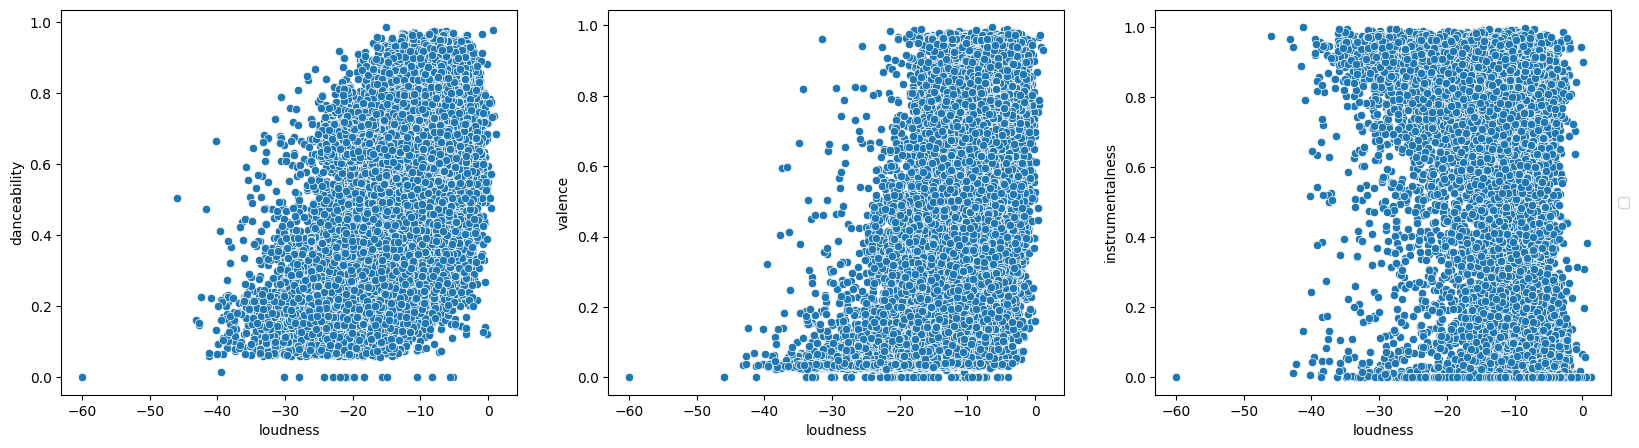

In [71]:
list3 = ["danceability","valence","instrumentalness"]
scatterplot(list3,"loudness",st_loudness)

#Duration:

In [72]:
st["duration_min"].describe()

count    62317.000000
mean         4.042117
std          1.883332
min          0.083333
25%          3.202667
50%          3.937783
75%          4.770667
max         76.358050
Name: duration_min, dtype: float64

In [73]:
max_outliers,min_outliers = outliers_calculation(st["duration_min"])
st_duration = st[(st["duration_min"]<max_outliers )&( st["duration_min"]>min_outliers)]

Text(0, 0.5, 'Duration Minute')

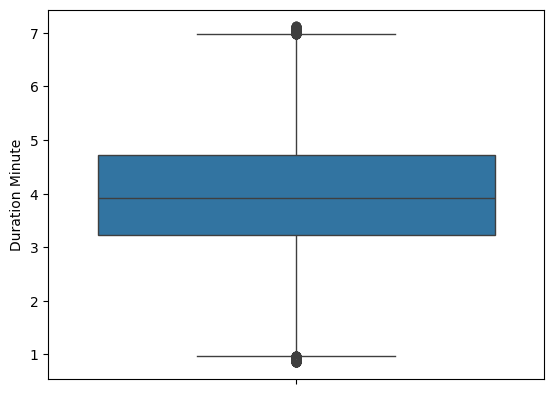

In [74]:
sns.boxplot(data=st_duration , y="duration_min")
plt.ylabel("Duration Minute")

In [75]:
st_year_duration = st_duration.groupby("year")["duration_min"].mean().reset_index()

Text(0, 0.5, 'Duration(Minute)')

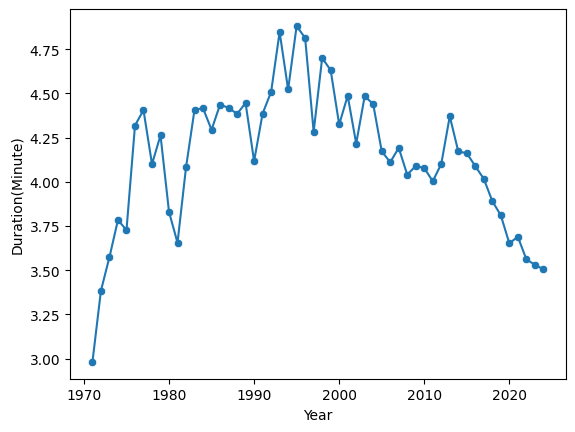

In [76]:
sns.lineplot(data=st_year_duration,x="year",y="duration_min")
sns.scatterplot(data=st_year_duration,x="year",y="duration_min")
plt.xlabel("Year")
plt.ylabel("Duration(Minute)")


* Focus on the Hook: In a fast-paced digital environment, artists are incentivized to get to the main "hook" or chorus of a song faster to capture a listener's attention before they skip to the next track.

* TikTok/Short-Form Content: The rise of short-form video content platforms further reinforces the demand for shorter, high-impact audio clips, pushing overall song durations down.

* CD Era vs. Vinyl Era: The peak in the mid-90s (around 4.8 minutes) corresponds with the peak popularity of the CD format, which did not have the time constraints of vinyl records (which required songs to fit on a side) or the revenue models of streaming.

Indian Languages And Their Analysis :

In [77]:
st["language"].unique()

array(['Tamil', 'Telugu', 'English', 'Hindi', 'Malayalam', 'Unknown',
       'Korean'], dtype=object)

In [78]:
#selecting songs with indian language
st_indian_lang_songs = st[(st["language"]!="English")&(st["language"]!="Unknown")&(st["language"]!="Korean")]
st_indian_lang_songs["language"].nunique()

4

In [79]:
st_count = st_indian_lang_songs["language"].value_counts().reset_index()

In [80]:
st_count

language  count
0      Tamil  12681
1      Hindi   5740
2     Telugu    324
3  Malayalam    282

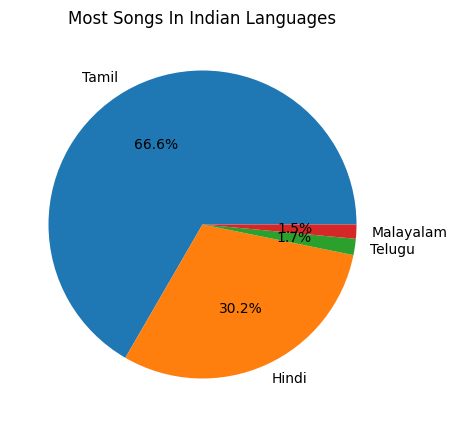

In [81]:
st_indian_lang_songs["language"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.ylabel("")   # removes the y-axis label
plt.title("Most Songs In Indian Languages")
plt.show()

In [82]:
st_popular = st_indian_lang_songs.groupby("language")["popularity"].median().reset_index().sort_values(by="popularity",ascending=False)

In [83]:
st_popular

language  popularity
0      Hindi        11.0
3     Telugu         9.0
2      Tamil         3.0
1  Malayalam         2.0

<Axes: xlabel='language', ylabel='popularity'>

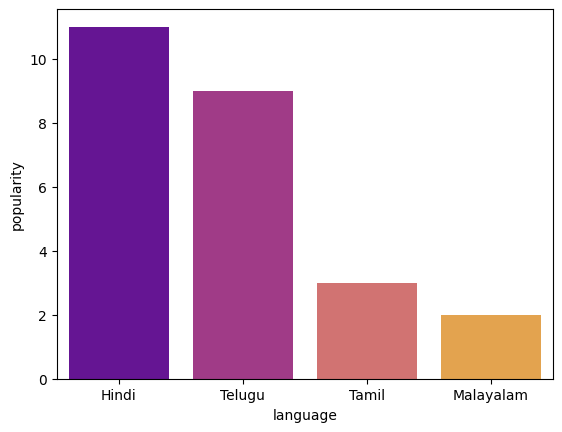

In [84]:
sns.barplot(data=st_popular,x="language",y="popularity",hue="language",palette='plasma',legend=None)

* Hindi song has more median popularity then other languages:

In [85]:
st_collaborations = st_indian_lang_songs[st_indian_lang_songs["artist_name"].str.contains(",")].reset_index(drop=True)

In [86]:
def collaborations(df,list):
  fig,axes = plt.subplots(1,4,figsize=(20,6))
  for i,category in enumerate(list):
    df_category = df.sort_values(by=category,ascending=False).reset_index(drop=True)
    df_most_category_artist = df_category["artist_name"].head(1000).value_counts().reset_index()
    ax = sns.barplot(data = df_most_category_artist.head(10),x="artist_name",y="count",hue="artist_name",palette="plasma",legend=None,ax=axes[i])
    ax.tick_params(axis='x', rotation=90)
    axes[i].set_title(f"Collaborations with high {category}")
  plt.xlabel("Artist Name")
  plt.show()


#Let's look which collaboration gives us most of different music features:

In [87]:
list=["danceability","valence","energy","acousticness"]

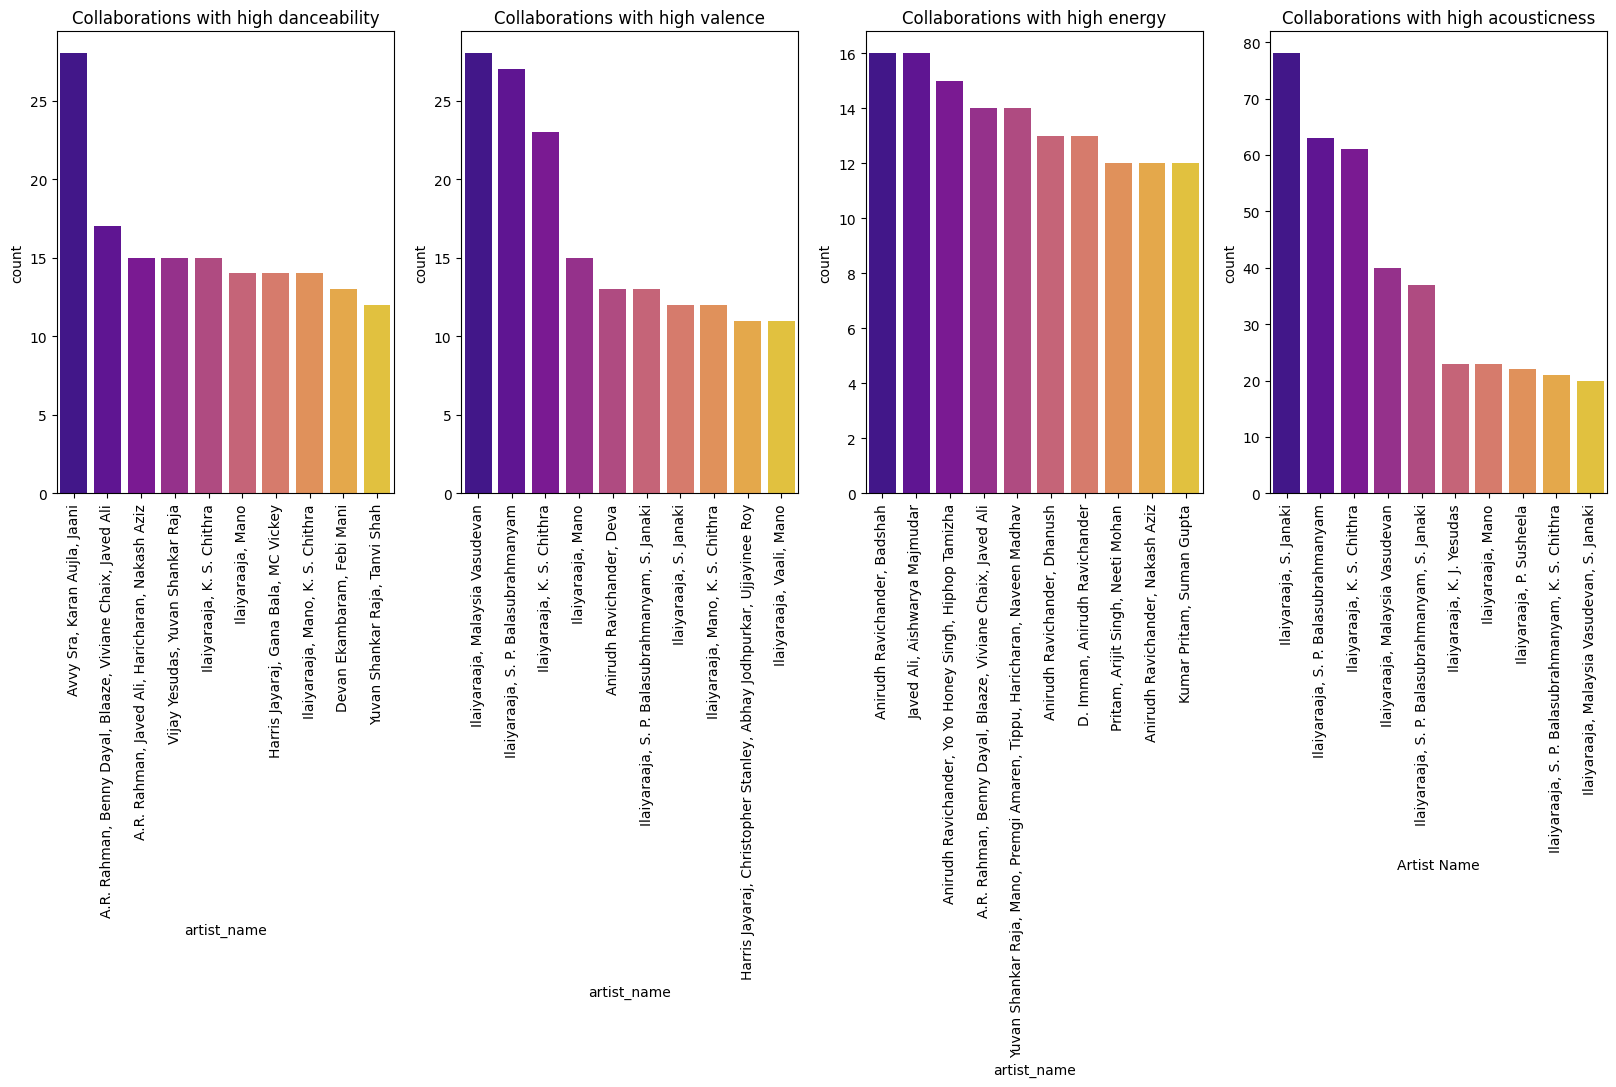

In [88]:
collaborations(st_collaborations,list)